In [ ]:
!pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 46.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninst

In [ ]:
#@title Install dependencies. { display-mode: "form" }
!pip3 install torch torchvision torchaudio transformers sentencepiece accelerate --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-man

In [ ]:
!pip install protobuf

In [ ]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
from transformers import T5Tokenizer, T5EncoderModel
import torch
import numpy as np
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title Load encoder-part of ProstT5 in half-precision. { display-mode: "form" }
# Load ProtT5 in half-precision (more specifically: the encoder-part of ProtT5-XL-U50 in half-precision)
transformer_link = "Rostlab/ProstT5"
print("Loading: {}".format(transformer_link))
model = T5EncoderModel.from_pretrained(transformer_link)
if device==torch.device("cpu"):
  print("Casting model to full precision for running on CPU ...")
  model.to(torch.float32) # only cast to full-precision if no GPU is available
model = model.to(device)
model = model.eval()
tokenizer = T5Tokenizer.from_pretrained(transformer_link, do_lower_case=False, legacy=True )

Loading: Rostlab/ProstT5


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/11.3G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.60k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/283 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
!wget https://raw.githubusercontent.com/33220311/halophilic/main/dataset/haloAdd.csv

--2024-06-17 04:00:16--  https://raw.githubusercontent.com/33220311/halophilic/main/dataset/haloAdd.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1362849 (1.3M) [text/plain]
Saving to: ‘haloAdd.csv’

haloAdd.csv         100%[===================>]   1.30M  --.-KB/s    in 0.02s   

2024-06-17 04:00:16 (53.4 MB/s) - ‘haloAdd.csv’ saved [1362849/1362849]



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('haloAdd.csv')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_train = df[df.set == "train"]
df_test = df[df.set == "test"]

df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

training_sequences, training_labels = df_train['sequence'], df_train['label']
test_sequences, testing_labels = df_test['sequence'], df_test['label']

In [ ]:
import re
from tqdm.auto import tqdm

In [ ]:
def embed_dataset(model, sequences, shift_left = 0, shift_right = -1):
    # prepare your protein sequences/structures as a list.
    # Amino acid sequences are expected to be upper-case ("PRTEINO" below)
    # while 3Di-sequences need to be lower-case ("strctr" below).
    sequence_examples = [" ".join(list(re.sub(r"[UZOB]", "X", sequence))) for sequence in sequences]

    # The direction of the translation is indicated by two special tokens:
    # if you go from AAs to 3Di (or if you want to embed AAs), you need to prepend "<AA2fold>"
    # if you go from 3Di to AAs (or if you want to embed 3Di), you need to prepend "<fold2AA>"
    sequence_examples = [ "<AA2fold>" + " " + s if s.isupper() else "<fold2AA>" + " " + s # this expects 3Di sequences to be already lower-case
                      for s in sequence_examples
                    ]

    inputs_embedding = []
    with torch.no_grad():
        for sample in tqdm(sequence_examples):
            ids = tokenizer.batch_encode_plus([sample], add_special_tokens=True,
                                              padding=True, is_split_into_words=True,
                                              return_tensors="pt").to(device)
            embedding = model(input_ids=ids.input_ids,attention_mask=ids.attention_mask)
            embedding = embedding[0].detach().cpu().numpy()[:shift_right]
            inputs_embedding.append(embedding)
    return inputs_embedding

In [ ]:
#training_embeddings = embed_dataset(model, training_sequences)
#validation_embeddings = embed_dataset(model, validation_sequences)
#test_embeddings = embed_dataset(model, test_sequences)

In [ ]:
sequence_examples = [" ".join(list(re.sub(r"[UZOB]", "X", sequence))) for sequence in training_sequences]

sequence_examples = [ "<AA2fold>" + " " + s if s.isupper() else "<fold2AA>" + " " + s # this expects 3Di sequences to be already lower-case
                      for s in sequence_examples
                    ]

batch_size = 1  # Adjust this based on your GPU memory and desired processing speed

training_embeddings = []
with torch.no_grad():
  for i in range(0, len(sequence_examples), batch_size):
    batch_examples = sequence_examples[i:i+batch_size]  # Get a batch of sequences

    # Encode the batch using your tokenizer
    ids = tokenizer.batch_encode_plus(batch_examples, add_special_tokens=True,
                                       padding=True, is_split_into_words=True,
                                       return_tensors="pt").to(device)

    # Process the batch with the model
    embedding = model(input_ids=ids.input_ids, attention_mask=ids.attention_mask)

    # Extract and clean the embeddings for each protein (assuming embedding[0] is relevant)
    batch_embeddings = embedding[0].detach().cpu().numpy()  # All embeddings in the batch
    for embedding in batch_embeddings:
      embedding = embedding[:-1]  # Remove padding token
      training_embeddings.append(embedding)


In [ ]:
sequence_examples = [" ".join(list(re.sub(r"[UZOB]", "X", sequence))) for sequence in test_sequences]

sequence_examples = [ "<AA2fold>" + " " + s if s.isupper() else "<fold2AA>" + " " + s # this expects 3Di sequences to be already lower-case
                      for s in sequence_examples
                    ]

batch_size = 1  # Adjust this based on your GPU memory and desired processing speed

test_embeddings = []
with torch.no_grad():
  for i in range(0, len(sequence_examples), batch_size):
    batch_examples = sequence_examples[i:i+batch_size]  # Get a batch of sequences

    # Encode the batch using your tokenizer
    ids = tokenizer.batch_encode_plus(batch_examples, add_special_tokens=True,
                                       padding=True, is_split_into_words=True,
                                       return_tensors="pt").to(device)

    # Process the batch with the model
    embedding = model(input_ids=ids.input_ids, attention_mask=ids.attention_mask)

    # Extract and clean the embeddings for each protein (assuming embedding[0] is relevant)
    batch_embeddings = embedding[0].detach().cpu().numpy()  # All embeddings in the batch
    for embedding in batch_embeddings:
      embedding = embedding[:-1]  # Remove padding token
      test_embeddings.append(embedding)


In [ ]:
training_per_protein = []
for embedding in training_embeddings:
  per_protein_embedding = embedding.mean(axis=0)  # Mean across residues
  training_per_protein.append(per_protein_embedding)

In [ ]:
test_per_protein = []
for embedding in test_embeddings:
  per_protein_embedding = embedding.mean(axis=0)  # Mean across residues
  test_per_protein.append(per_protein_embedding)

# Training

In [ ]:
train_dataset = np.array(training_per_protein)
#nsample, nx, ny = arr_train.shape
#train_dataset = arr_train.reshape((nsample, nx*ny))
train_dataset.shape

(5670, 1024)

In [ ]:
test_dataset = np.array(test_per_protein)
#nsample, nx, ny = arr_test.shape
#test_dataset = arr_test.reshape((nsample, nx*ny))
test_dataset.shape

(1356, 1024)

In [ ]:
def conf_matrix(confusion_matrix_data):
  from mlxtend.plotting import plot_confusion_matrix
  fig, ax = plot_confusion_matrix(conf_mat =confusion_matrix_data,
                                show_absolute=True,
                                show_normed=True,
                                #display_labels=class_dict.values(),
                                colorbar=True)
  labels = ['Non-halophilic', 'Halophilic']
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.show()


In [ ]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

In [ ]:
def error_rate(testing_labels, predicted_testing_labels):
    from sklearn.metrics import f1_score, matthews_corrcoef, accuracy_score, classification_report, recall_score, confusion_matrix
    import numpy as np

    bootstrap_performances = list()
    performances = list()
    f1_performances = list()
    sn = list()
    sp = list()
    Y = np.array(testing_labels)  # convert list of groundtruths to numpy
    Yhat = np.array(predicted_testing_labels)  # same same for predictions
    n_samples = len(Y)  # get number of samples
    n_bootstrap = 1000  # number of bootstrap iterations

    for i in range(n_bootstrap):  # for each bootstrap draw
        subset = np.random.choice(n_samples, n_samples, replace=True)
        # create a random subset of your predictions/targets with replacement
        Y_subset = Y[subset]
        Yhat_subset = Yhat[subset]

        bootstrap_performances.append(matthews_corrcoef(Y_subset, Yhat_subset))
        performances.append(accuracy_score(Y_subset, Yhat_subset))
        f1_performances.append(f1_score(Y_subset, Yhat_subset))
        sn.append(recall_score(Y_subset, Yhat_subset))

        tn, fp, fn, tp = confusion_matrix(Y_subset, Yhat_subset).ravel()
        sp.append(tn / (tn + fp))

    sd_mcc = np.std(bootstrap_performances)  # compute std deviation over the bootstrapped performances
    sd_acc = np.std(performances)
    sd_f1 = np.std(f1_performances)
    sd_sn = np.std(sn)
    sd_sp = np.std(sp)

    print('acc:', accuracy_score(testing_labels, predicted_testing_labels))
    print('f1:', f1_score(testing_labels, predicted_testing_labels))
    print('mcc:', matthews_corrcoef(testing_labels, predicted_testing_labels))

    tn, fp, fn, tp = confusion_matrix(testing_labels, predicted_testing_labels).ravel()
    specificity = tn / (tn + fp)

    print('sn:', recall_score(testing_labels, predicted_testing_labels))
    print('sp:', specificity)
    print('sd_acc:', sd_acc)
    print('sd_f1:', sd_f1)
    print('sd_mcc:', sd_mcc)
    print('sd_sn:', sd_sn)
    print('sd_sp:', sd_sp)
    print(classification_report(testing_labels, predicted_testing_labels))

    return (sd_acc, sd_mcc, sd_f1)


### LR

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
import plotly.express as px

import numpy as np

# Data utilities
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import os.path
import torch
import h5py

# Machine learning
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import cross_val_score

In [ ]:
lr = LogisticRegression()
lr_history = lr.fit(train_dataset, training_labels)
lr.score(test_dataset,testing_labels)

0.8510324483775811

In [ ]:
#grid_scorer = {'accuracy':make_scorer(accuracy_score),'f1':make_scorer(f1_score),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}
grid_scorer = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'mcc': make_scorer(matthews_corrcoef, greater_is_better=True),
    'sensitivity': make_scorer(recall_score, greater_is_better=True),
    'specificity': make_scorer(specificity_score, greater_is_better=True)
}

In [ ]:
scores = cross_validate(lr, train_dataset, training_labels, scoring= grid_scorer, cv=10)
scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'fit_time': array([0.26690865, 0.22719169, 0.23677921, 0.23140168, 0.34910464,
        0.3124423 , 0.28558898, 0.46853685, 0.27174425, 0.32851505]),
 'score_time': array([0.01099825, 0.01207256, 0.01031303, 0.01008153, 0.01128364,
        0.01070046, 0.01124191, 0.01214838, 0.01041532, 0.01672316]),
 'test_accuracy': array([0.73015873, 0.78306878, 0.89417989, 0.8994709 , 0.8994709 ,
        0.94532628, 0.8712522 , 0.88359788, 0.88359788, 0.91534392]),
 'test_f1': array([0.79627164, 0.84605757, 0.91869919, 0.9218107 , 0.92369478,
        0.95989651, 0.9102091 , 0.91970803, 0.91687657, 0.94103194]),
 'test_mcc': array([0.39866721, 0.48417077, 0.77394447, 0.79208004, 0.77998571,
        0.87409295, 0.69712983, 0.73037087, 0.72703752, 0.80883505]),
 'test_sensitivity': array([0.77662338, 0.87792208, 0.88051948, 0.87272727, 0.8961039 ,
        0.96363636, 0.96103896, 0.98181818, 0.94545455, 0.99739583]),
 'test_specificity': array([0.63186813, 0.58241758, 0.92307692, 0.95604396, 0.90659341

source https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression

In [ ]:
predicted_training_labels = lr.predict(train_dataset)
error_rate(training_labels, predicted_training_labels)

acc: 0.8925925925925926
f1: 0.9218128129413276
mcc: 0.7509090689190028
sn: 0.9327097947518836
sp: 0.8077979132344866
sd_acc: 0.004015339371960425
sd_f1: 0.0030767565103461134
sd_mcc: 0.00932003444376594
sd_sn: 0.003842792163074295
sd_sp: 0.009191172866847197
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1821
           1       0.91      0.93      0.92      3849

    accuracy                           0.89      5670
   macro avg       0.88      0.87      0.88      5670
weighted avg       0.89      0.89      0.89      5670



(0.004015339371960425, 0.00932003444376594, 0.0030767565103461134)

In [ ]:
predicted_testing_labels = lr.predict(test_dataset)
error_rate(testing_labels, predicted_testing_labels)

acc: 0.8510324483775811
f1: 0.912020905923345
mcc: 0.43056254881808953
sn: 0.8956372968349017
sp: 0.5721925133689839
sd_acc: 0.009627318274312692
sd_f1: 0.0061045007571896735
sd_mcc: 0.03457174614559581
sd_sn: 0.008881182115883866
sd_sp: 0.03737620900383499
              precision    recall  f1-score   support

           0       0.47      0.57      0.51       187
           1       0.93      0.90      0.91      1169

    accuracy                           0.85      1356
   macro avg       0.70      0.73      0.71      1356
weighted avg       0.87      0.85      0.86      1356



(0.009627318274312692, 0.03457174614559581, 0.0061045007571896735)

<ipython-input-21-286145be1eb1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-21-286145be1eb1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


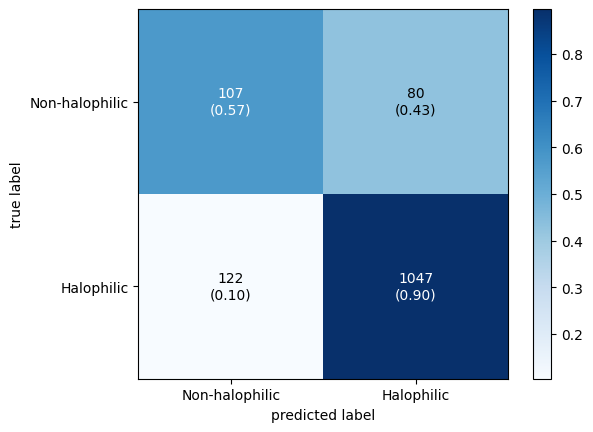

In [ ]:
classes = np.unique(testing_labels)

confusion_matrix_data = confusion_matrix(testing_labels, predicted_testing_labels, labels=classes)
conf_matrix(confusion_matrix_data)


In [ ]:
TP = confusion_matrix_data[1,1]
TN = confusion_matrix_data[0,0]
FP = confusion_matrix_data[0,1]
FN = confusion_matrix_data[1,0]

print(TP,TN, FP, FN)

sn = TP / float(TP + FN)
print(sn)
sp = TN / float(TN + FP)
print(sp)

1047 107 80 122
0.8956372968349017
0.5721925133689839


In [ ]:
#lr.save_weights('/result/LR.h5')
print(lr.coef_.shape)
lr_weights = lr.coef_
print(lr_weights)
print(np.max(lr_weights))
print(np.min(lr_weights))

(1, 1024)
[[-1.45099865 -0.11377046  0.24575576 ... -0.19840078 -0.39683786
   0.13299058]]
2.253422914006822
-2.5205576383587682


### MLP with Grid Search

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
# Basic Protocol 3 — Step 8

multilayerperceptron = MLPClassifier(solver='lbfgs', random_state=10, max_iter=1000)

parameters = {
    'hidden_layer_sizes': [(2056,1024),(2056,),(1024,)],
    #'learning_rate_init': [0.001, 0.0001, 0.01],
    #'activation':['identity', 'logistic', 'tanh', 'relu'],
    'solver':['adam'],
}

In [ ]:
grid_scorer ={'accuracy':make_scorer(accuracy_score),'f1':make_scorer(f1_score),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [ ]:
# Basic Protocol 3 — Step 9

classifiers = GridSearchCV(multilayerperceptron, parameters, cv=10, scoring=grid_scorer, refit='mcc')
history = classifiers.fit(train_dataset, training_labels)
classifier = classifiers.best_estimator_

In [ ]:
params = classifier.get_params()
params

In [ ]:
#from keras.models import model_from_json

# Save the best model's architecture to a JSON file
#model_json = grid_result.best_estimator_.model.to_json()
#with open("/content/drive/MyDrive/Halophilic/MLPESM_best_model.json", "w") as json_file:
#    json_file.write(model_json)

# Save the best model's weights to an HDF5 file
#grid_result.best_estimator_.model.save_weights("/content/drive/MyDrive/Halophilic/MLPESM_best_model_weights.h5")

In [ ]:
import pandas as pd
from pandas import DataFrame

In [ ]:
DataFrame(classifiers.cv_results_)

In [ ]:
df =pd.DataFrame(classifiers.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/ProstT5MLP.xlsx')


In [ ]:
predicted_training_labels = classifier.predict(train_dataset)
error_rate(training_labels, predicted_training_labels)

In [ ]:
# Basic Protocol 3 — Step 10

predicted_mlp = classifier.predict(test_dataset)
accuracy = accuracy_score(testing_labels, predicted_mlp)
error_rate(testing_labels, predicted_mlp)

In [ ]:
from pandas import DataFrame
cv_results = DataFrame(classifiers.cv_results_)
print(cv_results)

In [ ]:
# Further metrics
from sklearn.metrics import confusion_matrix

# Data visualization
import plotly.express as px

In [ ]:
classes = np.unique(testing_labels)

confusion_matrix_data = confusion_matrix(testing_labels, predicted_mlp, labels=classes)
conf_matrix(confusion_matrix_data)

In [ ]:
TP = confusion_matrix_data[1,1]
TN = confusion_matrix_data[0,0]
FP = confusion_matrix_data[0,1]
FN = confusion_matrix_data[1,0]

print(TP,TN, FP, FN)

sn = TP / float(TP + FN)
print(sn)
sp = TN / float(TN + FP)
print(sp)

In [ ]:
#classifier.save_weights('/result/MLP.h5')

#fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = classifier.coefs_[0].min(), classifier.coefs_[0].max()
#for coef, ax in zip(classifier.coefs_[0].T, axes.ravel()):
#    ax.matshow(coef.reshape(1024, ), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
#    ax.set_xticks(())
#    ax.set_yticks(())

#plt.show()

In [ ]:
vmax

In [ ]:
weights = classifier.coefs_
print(len(weights))
print("shape",weights[0].shape,"content",weights[0])
print("shape",weights[1].shape,"content",weights[1])
#print("shape",weights[2].shape,"content",weights[2])


### CNN with GridSearch

In [ ]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D, AveragePooling1D
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from time import time

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [ ]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [ ]:
n_timesteps, n_features, n_outputs =train_dataset.shape[0], train_dataset.shape[1], Y_train.shape[1]

In [ ]:
n_epochs = 30 # 30
n_epochs_cv = 10 # 10  # reduce number of epochs for cross validation for performance reason

n_cv = 10
validation_ratio = 0.10

In [ ]:
def create_cnn_model(pool_type='max', conv_activation='tanh', dropout_rate=0.1, kernel=3, optimizer='adam'):
    # create model
    model = Sequential()

    # first layer: convolution
    #model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv1D(filters=128, kernel_size=kernel, activation=conv_activation,input_shape=(n_features,1)))
    # second series of layers: convolution, pooling, and dropout
    model.add(Conv1D(32, kernel_size=kernel, activation=conv_activation))
    if pool_type == 'max':
        model.add(MaxPooling1D(pool_size=2))
    if pool_type == 'average':
        model.add(AveragePooling1D(pool_size=2))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    # third series of layers: convolution, pooling, and dropout
    model.add(Conv1D(64, kernel_size=kernel, activation=conv_activation))   # 32   10
    if pool_type == 'max':
        model.add(MaxPooling1D(pool_size=2))
    if pool_type == 'average':
        model.add(AveragePooling1D(pool_size=2))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    model.add(Conv1D(64, kernel_size=kernel, activation=conv_activation))   # 32   10
    if pool_type == 'max':
        model.add(MaxPooling1D(pool_size=2))
    if pool_type == 'average':
        model.add(AveragePooling1D(pool_size=2))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    # fourth series
    model.add(Flatten())
    model.add(Dense(64, activation='sigmoid')) # 64
    # add a dropout layer if rate is not null
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(
        optimizer= optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', 'Recall', 'Precision', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'],
        )
    return model

In [ ]:
cnn = create_cnn_model()

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1022, 128)         512       
                                                                 
 conv1d_1 (Conv1D)           (None, 1020, 32)          12320     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 510, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 510, 32)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 508, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 254, 64)          0         
 1D)                                                    

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=150, verbose=1)

In [ ]:
# fit network
history = cnn.fit(train_dataset, Y_train,
                        validation_data=(test_dataset, Y_test),
                        callbacks=[es],
                        epochs=10, verbose=1
                        )

Epoch 1/10
177/178 [============================>.] - ETA: 0s - loss: 0.3180 - accuracy: 0.8676 - recall: 0.9165 - precision: 0.8915 - true_positives: 3524.0000 - true_negatives: 1390.0000 - false_positives: 429.0000 - false_negatives: 321.0000

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1788, in test_step
        y_pred = self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 1024, 1), found shape=(None, 1, 1024)


In [ ]:
# optimize model
start = time()

# create model
model = KerasClassifier(build_fn=create_cnn_model, verbose=1)
# define parameters and values for grid search
param_grid = {
    'pool_type': ['max','average'], #max
    'conv_activation': ['relu', 'tanh'],#relu
    'epochs': [10],
    'kernel':[1,2,3,4], #2
    'optimizer':['adam','sgd'] #adam
}

<ipython-input-39-d21e2dc07263>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_cnn_model, verbose=1)


In [ ]:
grid_scorer = {'accuracy':make_scorer(accuracy_score),'f1':make_scorer(f1_score),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10, scoring=grid_scorer, refit='mcc')
grid_result = grid.fit(train_dataset, Y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/10
178/178 [==============================] - 8s 35ms/step - loss: 0.5799 - accuracy: 0.7041 - recall: 0.9114 - precision: 0.7240 - true_positives: 3508.0000 - true_negatives: 484.0000 - false_positives: 1337.0000 - false_negatives: 341.0000
Epoch 2/10
178/178 [==============================] - 6s 33ms/step - loss: 0.4069 - accuracy: 0.8169 - recall: 0.8883 - precision: 0.8490 - true_positives: 3419.0000 - true_negatives: 1213.0000 - false_positives: 608.0000 - false_negatives: 430.0000
Epoch 3/10
178/178 [==============================] - 6s 34ms/step - loss: 0.3679 - accuracy: 0.8397 - recall: 0.8997 - precision: 0.8688 - true_positives: 3463.0000 - true_negatives: 1298.0000 - false_positives: 523.0000 - false_negatives: 386.0000
Epoch 4/10
178/178 [==============================] - 6s 33ms/step - loss: 0.3572 - accuracy: 0.8499 - recall: 0.9044 - precision: 0.8782 - true_positives: 3481.0000 - true_negatives: 1338.0000 - false_positives: 483.0000 - false_negatives: 368.0000


In [ ]:
classifier = grid.best_estimator_

params = classifier.get_params()
params

{'verbose': 1,
 'conv_activation': 'relu',
 'epochs': 10,
 'kernel': 1,
 'optimizer': 'adam',
 'pool_type': 'average',
 'build_fn': <function __main__.create_cnn_model(pool_type='max', conv_activation='tanh', dropout_rate=0.1, kernel=3, optimizer='adam')>}

In [ ]:
from keras.models import model_from_json

# Save the best model's architecture to a JSON file
model_json = grid_result.best_estimator_.model.to_json()
with open("/content/drive/MyDrive/Halophilic/CNNESM_best_model.json", "w") as json_file:
    json_file.write(model_json)

# Save the best model's weights to an HDF5 file
grid_result.best_estimator_.model.save_weights("/content/drive/MyDrive/Halophilic/CNNESM_best_model_weights.h5")

In [ ]:
predicted_training_labels = classifier.predict(train_dataset)
error_rate(training_labels, predicted_training_labels)

178/178 [==============================] - 2s 8ms/step
acc: 0.8666666666666667
f1: 0.9065974796145293
mcc: 0.6856000921910483
sn: [0.957056821157371, 0.9514767932489452, 0.9588897617177271, 0.9558097218611905, 0.9555439330543933, 0.9530723360124449, 0.9540109746537758, 0.957996347508479, 0.9517313746065058, 0.958730977559969, 0.9614106823409149, 0.9469716662334287, 0.9480351602895554, 0.9579463364293086, 0.9528228924980665, 0.9556663168940189, 0.954474505723205, 0.9572428090178803, 0.9494193548387097, 0.9606421543241843, 0.9554057557687322, 0.9495579823192928, 0.9507635597682991, 0.9514690451206715, 0.9544856616679821, 0.9495556717198118, 0.9502203785325383, 0.9582278481012658, 0.9542346133613887, 0.9581124072110286, 0.9490216271884655, 0.9492063492063492, 0.9542262678803641, 0.951948051948052, 0.9514613778705637, 0.9542364016736402, 0.952, 0.9509627727856226, 0.9540109746537758, 0.9563329928498467, 0.9522832221652129, 0.9486103828002097, 0.9588281868566905, 0.9525065963060686, 0.95393

(0.004412586610070476, 0.010080125428822397, 0.003299503541590844)

In [ ]:
predicted_cnn = classifier.predict(test_dataset)
error_rate(testing_labels, predicted_cnn)

43/43 [==============================] - 0s 9ms/step
acc: 0.8451327433628318
f1: 0.9112426035502958
mcc: 0.30628982420737433
sn: [0.9182978723404255, 0.9261168384879725, 0.9408740359897172, 0.9145516074450084, 0.91928632115548, 0.9280205655526992, 0.9201030927835051, 0.9288774635818338, 0.9291808873720137, 0.9184188393608074, 0.9242685025817556, 0.921875, 0.9160035366931919, 0.9247863247863248, 0.9159592529711376, 0.9329268292682927, 0.9224062772449869, 0.914572864321608, 0.9181034482758621, 0.9171648163962425, 0.9299145299145299, 0.908311910882605, 0.9146959459459459, 0.9218487394957983, 0.9136752136752136, 0.9012765957446809, 0.9219554030874786, 0.9114139693356048, 0.928388746803069, 0.9290657439446367, 0.9123711340206185, 0.9179755671902269, 0.9227430555555556, 0.9266609145815358, 0.911130284728214, 0.9328743545611016, 0.9237435008665511, 0.9271012006861064, 0.9342327150084317, 0.9233419465977606, 0.9278969957081545, 0.928388746803069, 0.9210977701543739, 0.9322033898305084, 0.92044

(0.009339526499106049, 0.034564977239421396, 0.005863342127783812)

In [ ]:
def display_cv_results(search_results):
    print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
    means = search_results.cv_results_['mean_test_score']
    stds = search_results.cv_results_['std_test_score']
    params = search_results.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))

In [ ]:
# summarize results
#print('time for grid search = {:.0f} sec'.format(time()-start))
#display_cv_results(grid_result)

In [ ]:
df =pd.DataFrame(grid.cv_results_)
#new_path = '/content/test.xls'
#writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/ProstT5CNN.xlsx')

In [ ]:
df =pd.DataFrame(train_dataset)
df.to_excel('/content/cnn_train_dataset.xlsx')
df =pd.DataFrame(training_labels)
df.to_excel('/content/cnn_training_labels.xlsx')
df =pd.DataFrame(predicted_training_labels)
df.to_excel('/content/cnn_pred_train_labels.xlsx')

df =pd.DataFrame(test_dataset)
df.to_excel('/content/cnn_test_dataset.xlsx')
df =pd.DataFrame(testing_labels)
df.to_excel('/content/cnn_testing_labels.xlsx')
df =pd.DataFrame(predicted_cnn)
df.to_excel('/content/cnn_pred_test_labels.xlsx')

In [ ]:
#from pandas import DataFrame
#cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_conv_activation','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
# Further metrics
from sklearn.metrics import confusion_matrix

# Data visualization
import plotly.express as px

<ipython-input-24-286145be1eb1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-24-286145be1eb1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


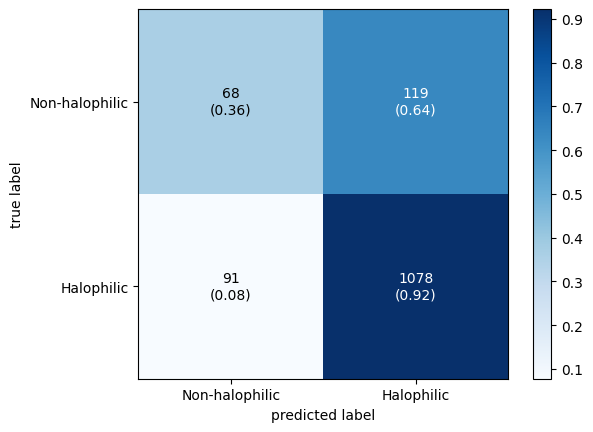

array([[  68,  119],
       [  91, 1078]])

In [ ]:
classes = np.unique(testing_labels)

confusion_matrix_data = confusion_matrix(testing_labels, predicted_cnn, labels=classes)
conf_matrix(confusion_matrix_data)
confusion_matrix_data

In [ ]:
TP = confusion_matrix_data[1,1]
TN = confusion_matrix_data[0,0]
FP = confusion_matrix_data[0,1]
FN = confusion_matrix_data[1,0]

In [ ]:
sn = TP / float(TP + FN)
print(sn)

In [ ]:
sp = TN / float(TN + FP)
print(sp)

In [ ]:
confusion_matrix_figure = px.imshow(
    confusion_matrix_data,
    labels=dict(x="True label", y="Predicted label", color="# of samples"),
    x=classes,
    y=classes,
    color_continuous_scale='Gray_r'
)
confusion_matrix_figure.show()

### RNN with GridSearch

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Input, Embedding, LSTM, Dropout, Dense, InputLayer, GRU
from tensorflow.keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Embedding, Bidirectional
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from time import time
from tensorflow.keras import layers

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
max_length = 1280

In [ ]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
input_shape = X_train[1,:].shape

In [ ]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [ ]:
def create_rnn_model(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam'):
    x_input = layers.Input(input_shape)
    #emb = Embedding(21, units, input_length=max_length)(x_input)
    rnn = SimpleRNN(units, activity_regularizer=l2(regularizer), return_sequences = True)(x_input) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x = Dropout(dropout_rate)(rnn)
    rnn2 =SimpleRNN(units, activity_regularizer=l2(dropout_rate))(x) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x2 = Dropout(dropout_rate)(rnn2)
    # softmax classifier
    x_output = Dense(1, activation='sigmoid')(x2)

    model = Model(inputs=x_input, outputs=x_output)
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_init),#solver,#
        loss='binary_crossentropy',
        metrics=['accuracy'],
        )
    return model

In [ ]:
rnn_model = create_rnn_model()
rnn_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1024, 50)          2600      
                                                                 
 dropout_2 (Dropout)         (None, 1024, 50)          0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7,701
Trainable params: 7,701
Non-trainable p

In [ ]:
start = time()

# create model
model = KerasClassifier(build_fn=create_rnn_model, verbose=1, epochs=5)
# define parameters and values for grid search

parameters = {
    'units':[50], # 1024
    #'learning_rate_init': [0.001, 0.01],
    'solver':['sgd', 'adam'],
    'epochs':[2,3,5,10]
    #'dropout_rate':[0.0,0.05, 0.1], #0.05
    #'regularizer':[0.0,0.05, 0.1],
}

<ipython-input-50-d4d62c73a518>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_rnn_model, verbose=1, epochs=5)


In [ ]:
metrics = {'accuracy':make_scorer(accuracy_score,greater_is_better=True),'f1':make_scorer(f1_score,greater_is_better=True),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10, scoring=metrics, refit='mcc')
grid_result = grid.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/3
178/178 [==============================] - 93s 512ms/step - loss: 0.5101 - accuracy: 0.7469
Epoch 2/3
178/178 [==============================] - 91s 511ms/step - loss: 0.5773 - accuracy: 0.7039
Epoch 3/3
178/178 [==============================] - 91s 512ms/step - loss: 0.6218 - accuracy: 0.6783


In [ ]:
classifier = grid.best_estimator_

In [ ]:
params = classifier.get_params()
params

{'verbose': 1,
 'epochs': 3,
 'solver': 'adam',
 'units': 50,
 'build_fn': <function __main__.create_rnn_model(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam')>}

In [ ]:
#cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_units','param_dropout_rate','param_regularizer','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
df =pd.DataFrame(grid.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/ProstT5RNN.xlsx')

In [ ]:
predicted_training_labels = classifier.predict(X_train)
predicted_training_labels = np.where(predicted_training_labels > 0.5, 1, 0)
predicted_training_labels = np.reshape(predicted_training_labels,(len(predicted_training_labels),)).astype(int)
error_rate(Y_train, predicted_training_labels)

178/178 [==============================] - 18s 101ms/step
acc: 0.6786596119929453
f1: 0.8081297388374054
mcc: 0.021472204124868808
sn: [0.9989526053940823, 0.9978902953586498, 0.9965959675307672, 0.9968806862490253, 0.9968619246861925, 0.9976665802437127, 0.997125685915861, 0.9971301852334986, 0.9968520461699895, 0.9979365488779984, 0.9976999744441605, 0.9950610865609566, 0.9971561530506722, 0.9966460268317854, 0.9966486207785512, 0.9971143756558237, 0.9955775234131113, 0.9984451930551956, 0.9974193548387097, 0.9968928016571724, 0.9966295047964739, 0.9960998439937597, 0.9963138493944181, 0.9971143756558237, 0.9976322020520916, 0.9976476738107685, 0.9971480425200934, 0.9972151898734177, 0.9965807469752762, 0.9981442205726405, 0.9951081359423275, 0.996031746031746, 0.9966189856957087, 0.9968831168831169, 0.9960855949895616, 0.9963389121338913, 0.9953548387096774, 0.996405648267009, 0.9960804807943558, 0.9971910112359551, 0.9946126218573628, 0.9963293130571579, 0.9981525468461335, 0.99604

(0.006080177558426431, 0.013654570492409543, 0.004322124656257411)

In [ ]:
predicted_rnn = classifier.predict(X_test)
predicted_rnn = np.where(predicted_rnn > 0.5, 1, 0)
predicted_rnn = np.reshape(predicted_rnn,(len(predicted_rnn),)).astype(int)
error_rate(Y_test, predicted_rnn)

43/43 [==============================] - 4s 101ms/step
acc: 0.8606194690265486
f1: 0.9249702262802699
mcc: 0.0377856202923472
sn: [0.9932432432432432, 1.0, 0.9965841161400513, 0.9991379310344828, 0.9966386554621849, 0.9957081545064378, 0.9983136593591906, 0.9974468085106383, 0.9974226804123711, 0.9982758620689656, 0.9974380871050385, 0.9974811083123426, 0.9991394148020654, 0.9966244725738397, 0.9974424552429667, 0.9940222032450897, 0.9965694682675815, 0.9991364421416234, 0.9974182444061962, 0.9956933677863911, 0.998303647158609, 0.9957841483979764, 0.998289136013687, 0.9958053691275168, 0.9940119760479041, 0.9974402730375427, 0.9983122362869198, 0.9991546914623838, 0.9991431019708654, 0.9931914893617021, 0.9982920580700256, 0.9965957446808511, 0.9941126997476871, 0.994017094017094, 0.9966216216216216, 0.9974025974025974, 0.9948674080410608, 0.9991474850809889, 0.9956101843722563, 0.9991386735572783, 0.9991518235793045, 0.9939810834049871, 0.9991460290350128, 0.994017094017094, 0.998277

(0.009108117457609905, 0.037982525952748016, 0.0052743188796589725)

### GRU with GridSearch

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Input, Embedding, LSTM, Dropout, Dense, InputLayer, GRU
from tensorflow.keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Embedding, Bidirectional
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from time import time
from tensorflow.keras import layers

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
max_length = 1280

In [ ]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
input_shape = X_train[1,:].shape

In [ ]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [ ]:
def create_gru_model(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam'):
    x_input = layers.Input(input_shape)
    #emb = Embedding(21, units, input_length=max_length)(x_input)
    gru = GRU(units, activity_regularizer=l2(regularizer), return_sequences = True)(x_input) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x = Dropout(dropout_rate)(gru)
    gru2 =GRU(units, activity_regularizer=l2(dropout_rate))(x) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x2 = Dropout(dropout_rate)(gru2)
    # softmax classifier
    x_output = Dense(1, activation='sigmoid')(x2)

    model = Model(inputs=x_input, outputs=x_output)
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_init),#solver,#
        loss='binary_crossentropy',
        metrics=['accuracy'],
        )
    return model

In [ ]:
gru_model = create_gru_model()
gru_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 gru (GRU)                   (None, 1024, 50)          7950      
                                                                 
 dropout_6 (Dropout)         (None, 1024, 50)          0         
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23,301
Trainable params: 23,301
Non-trainable

In [ ]:
start = time()

# create model
model = KerasClassifier(build_fn=create_gru_model, verbose=1, batch_size = 256, epochs=10)
# define parameters and values for grid search

parameters = {
    'units':[50], # 1024
    #'learning_rate_init': [0.001, 0.01],
    'solver':['adam'],
    #'epochs':[3,5,10]
    #'dropout_rate':[0.0,0.05, 0.1], #0.05
    #'regularizer':[0.0,0.05, 0.1],
}

<ipython-input-69-c73ca1a6eab2>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_gru_model, verbose=1, batch_size = 256, epochs=10)


In [ ]:
metrics = {'accuracy':make_scorer(accuracy_score,greater_is_better=True),'f1':make_scorer(f1_score,greater_is_better=True),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10, scoring=metrics, refit='mcc')
grid_result = grid.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Epoch 1/10
23/23 [==============================] - 44s 2s/step - loss: 0.6541 - accuracy: 0.6707
Epoch 2/10
23/23 [==============================] - 41s 2s/step - loss: 0.6290 - accuracy: 0.6788
Epoch 3/10
23/23 [==============================] - 40s 2s/step - loss: 0.6266 - accuracy: 0.6788
Epoch 4/10
23/23 [==============================] - 41s 2s/step - loss: 0.6257 - accuracy: 0.6788
Epoch 5/10
23/23 [==============================] - 40s 2s/step - loss: 0.6243 - accuracy: 0.6788
Epoch 6/10
23/23 [==============================] - 41s 2s/step - loss: 0.6223 - accuracy: 0.6788
Epoch 7/10
23/23 [==============================] - 40s 2s/step - loss: 0.6161 - accuracy: 0.6788
Epoch 8/10
23/23 [==============================] - 40s 2s/step - loss: 0.5860 - accuracy: 0.6820
Epoch 9/10
23/23 [==============================] - 40s 2s/step - loss: 0.5398 - accuracy: 0.7081
Epoch 10/10
23/23 [==============================] - 40s 2s/step - loss: 0.5314 - accuracy: 0.7122


In [ ]:
classifier = grid.best_estimator_

In [ ]:
params = classifier.get_params()
params

{'verbose': 1,
 'batch_size': 256,
 'epochs': 10,
 'solver': 'adam',
 'units': 50,
 'build_fn': <function __main__.create_gru_model(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam')>}

In [ ]:
#cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_units','param_dropout_rate','param_regularizer','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
df =pd.DataFrame(grid.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/ProstT5GRU.xlsx')

In [ ]:
predicted_training_labels = classifier.predict(X_train)
predicted_training_labels = np.where(predicted_training_labels > 0.5, 1, 0)
predicted_training_labels = np.reshape(predicted_training_labels,(len(predicted_training_labels),)).astype(int)
error_rate(Y_train, predicted_training_labels)

178/178 [==============================] - 33s 183ms/step
acc: 0.7156966490299823
f1: 0.80634310427679
mcc: 0.29470405359443946
sn: [0.8779785284105787, 0.8660337552742616, 0.8737889499869076, 0.8700285937093839, 0.8716004184100419, 0.8714026445423905, 0.8735301802978834, 0.8729454735194365, 0.8751311647429171, 0.8790301779726593, 0.8742652696141068, 0.8684689368338966, 0.8717683557394003, 0.8759029927760578, 0.865687032740397, 0.8722455403987408, 0.8681061394380853, 0.8717284270536408, 0.8696774193548387, 0.8705334023821854, 0.8742546020222971, 0.8676547061882476, 0.8704581358609794, 0.8746065057712487, 0.8731912654564589, 0.876633559853633, 0.8768472906403941, 0.8688607594936709, 0.8705944239873751, 0.8724814422057264, 0.8779608650875386, 0.8711640211640211, 0.8738621586475943, 0.8696103896103896, 0.8703027139874739, 0.867939330543933, 0.8699354838709678, 0.8775353016688061, 0.8714397700548733, 0.8799795709908069, 0.8699332991277579, 0.8694284216046145, 0.8799155449986804, 0.86596306

(0.005865056682100976, 0.01359023847192599, 0.004639182304313926)

In [ ]:
predicted_gru = classifier.predict(X_test)
predicted_gru = np.where(predicted_gru > 0.5, 1, 0)
predicted_gru = np.reshape(predicted_gru,(len(predicted_gru),)).astype(int)
error_rate(Y_test, predicted_gru)

43/43 [==============================] - 8s 189ms/step
acc: 0.7861356932153393
f1: 0.8735832606800349
mcc: 0.1828717700240396
sn: [0.8673986486486487, 0.8575085324232082, 0.852263023057216, 0.8577586206896551, 0.8689075630252101, 0.8660944206008584, 0.8591905564924115, 0.843404255319149, 0.8737113402061856, 0.8370689655172414, 0.8650725875320239, 0.855583543240974, 0.8545611015490534, 0.8666666666666667, 0.8525149190110827, 0.8462852263023057, 0.855917667238422, 0.8739205526770294, 0.8752151462994836, 0.8380706287683032, 0.8625954198473282, 0.8591905564924115, 0.8656971770744226, 0.8640939597315436, 0.8588537211291702, 0.8737201365187713, 0.8624472573839662, 0.863905325443787, 0.8611825192802056, 0.8697872340425532, 0.860802732707088, 0.8391489361702128, 0.8536585365853658, 0.8487179487179487, 0.856418918918919, 0.8632034632034632, 0.8485885372112917, 0.86615515771526, 0.8665496049165935, 0.8561584840654608, 0.8592027141645462, 0.8572656921754084, 0.8548249359521777, 0.8512820512820513

(0.010938471541989177, 0.032990436975804095, 0.0071887062669048155)

### LSTM with GridSearch

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Input, Embedding, LSTM, Dropout, Dense, InputLayer
from tensorflow.keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Embedding, Bidirectional
from keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from time import time
from tensorflow.keras import layers

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
max_length = 1280

In [ ]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
input_shape = X_train[1,:].shape

In [ ]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [ ]:
def create_lstm_model(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam'):
    x_input = layers.Input(input_shape)
    #emb = Embedding(21, units, input_length=max_length)(x_input)
    lstm = LSTM(units, activity_regularizer=l2(regularizer))(x_input) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x = Dropout(dropout_rate)(lstm)
    #lstm2 =LSTM(units, activity_regularizer=l2(dropout_rate))(x) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    #x2 = Dropout(dropout_rate)(lstm2)
    # softmax classifier
    x_output = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=x_input, outputs=x_output)
    # Compile model
    model.compile(
        optimizer=solver,#tf.keras.optimizers.Adam(learning_rate=learning_rate_init),
        loss='binary_crossentropy',
        metrics=['accuracy'],
        )
    return model

In [ ]:
lstm_model = create_lstm_model()
lstm_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time()

# create model
model = KerasClassifier(build_fn=create_lstm_model, verbose=1, batch_size=256, epochs=5)
# define parameters and values for grid search

parameters = {
    'units':[50], # 1024
    #'learning_rate_init': [0.001, 0.01],
    'solver':['adam'],
    #'epochs':[3,5,10],
    #'dropout_rate':[0.0,0.05, 0.1], #0.05
    #'regularizer':[0.0,0.05, 0.1],
}

<ipython-input-88-7d51c6a25297>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_lstm_model, verbose=1, batch_size=256, epochs=5)


In [ ]:
metrics = {'accuracy':make_scorer(accuracy_score,greater_is_better=True),'f1':make_scorer(f1_score,greater_is_better=True),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10, scoring=metrics, refit='mcc')
grid_result = grid.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Epoch 1/5
23/23 [==============================] - 23s 913ms/step - loss: 0.6613 - accuracy: 0.6728
Epoch 2/5
23/23 [==============================] - 21s 915ms/step - loss: 0.6309 - accuracy: 0.6788
Epoch 3/5
23/23 [==============================] - 20s 888ms/step - loss: 0.6284 - accuracy: 0.6788
Epoch 4/5
23/23 [==============================] - 21s 911ms/step - loss: 0.6280 - accuracy: 0.6788
Epoch 5/5
23/23 [==============================] - 21s 908ms/step - loss: 0.6276 - accuracy: 0.6788


In [ ]:
classifier = grid.best_estimator_

In [ ]:
params = classifier.get_params()
params

{'verbose': 1,
 'batch_size': 256,
 'epochs': 5,
 'solver': 'adam',
 'units': 50,
 'build_fn': <function __main__.create_lstm_model(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam')>}

In [ ]:
#cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_units','param_dropout_rate','param_regularizer','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
df =pd.DataFrame(grid.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/ProstT5LSTM.xlsx')

In [ ]:
predicted_training_labels = classifier.predict(X_train)
predicted_training_labels = np.where(predicted_training_labels > 0.5, 1, 0)
predicted_training_labels = np.reshape(predicted_training_labels,(len(predicted_training_labels),)).astype(int)
error_rate(Y_train, predicted_training_labels)

178/178 [==============================] - 21s 116ms/step
acc: 0.6788359788359788
f1: 0.8086983926883076
mcc: 0.0
sn: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.006067042153683595, 0.0, 0.004306772776841184)

In [ ]:
predicted_lstm = classifier.predict(X_test)
predicted_lstm = np.where(predicted_lstm > 0.5, 1, 0)
predicted_lstm = np.reshape(predicted_lstm,(len(predicted_lstm),)).astype(int)
error_rate(Y_test, predicted_lstm)

43/43 [==============================] - 5s 116ms/step
acc: 0.862094395280236
f1: 0.925940594059406
mcc: 0.0
sn: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.009120942014934137, 0.0, 0.0052629142327598535)

### BiLSTM with GridSearch

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Bidirectional, Input, Embedding, LSTM, Dropout, Dense, InputLayer
from tensorflow.keras.models import Model, Sequential
from keras import regularizers
from keras.layers import Embedding, Bidirectional
from keras.regularizers import l2
from sklearn.metrics import make_scorer
from keras.wrappers.scikit_learn import KerasClassifier
from time import time

In [ ]:
from numpy.random import seed
seed(1)

In [ ]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(2)

In [ ]:
X_train, X_test= train_dataset, test_dataset
y_train, y_test = training_labels, testing_labels

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
input_shape = X_train[1,:].shape

In [ ]:
input_shape

(1024, 1)

In [ ]:
Y_train = np.reshape(y_train,(len(y_train),1)).astype(int)
Y_test = np.reshape(y_test,(len(y_test),1)).astype(int)

In [ ]:
num_words = 22
num_classes = 1
n_cv = 3
num_hiddens = 1280
num_steps = 10
num_layers = 1
max_length = 2560

In [ ]:
def create_blstm_model1(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam'):
    x_input = Input(input_shape)
    #emb = Embedding(21, units, input_length=max_length)(x_input)
    bi_rnn = Bidirectional(LSTM(units, activity_regularizer=l2(dropout_rate),return_sequences=True))(x_input) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x = Dropout(dropout_rate)(bi_rnn)
    bi_rnn2 = Bidirectional(LSTM(units, activity_regularizer=l2(dropout_rate)))(x) #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    x2 = Dropout(dropout_rate)(bi_rnn2)
    x_output = Dense(1, activation='sigmoid')(x2)

    model = Model(inputs=x_input, outputs=x_output)
    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_init),#solver,#
        loss='binary_crossentropy',
        metrics=['accuracy'],
        )
    return model

In [ ]:
blstm1 = create_blstm_model1()

In [ ]:
blstm1.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1024, 1)]         0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 1024, 100)        20800     
 nal)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 1024, 100)         0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 100)              60400     
 nal)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 101 

In [ ]:
# Early Stopping
#es = EarlyStopping(monitor='val_loss', patience=150, verbose=1)

#history = blstm1.fit(train_pad, y_train,
#                        validation_data=(val_pad, y_val),
#                        callbacks=[es],
#                        epochs=3, batch_size=256, verbose=1
#                        )

In [ ]:
#predicted_training_labels = blstm1.predict(train_pad)
#predicted_training_labels = np.where(predicted_training_labels > 0.5, 1, 0)
#predicted_training_labels = np.reshape(predicted_training_labels,(len(predicted_training_labels),)).astype(int)
#error_rate(y_train, predicted_training_labels)

In [ ]:
#predicted_testing_labels = blstm1.predict(val_pad)
#predicted_testing_labels = np.where(predicted_testing_labels > 0.5, 1, 0)
#predicted_testing_labels = np.reshape(predicted_testing_labels,(len(predicted_testing_labels),)).astype(int)
#error_rate(y_val, predicted_testing_labels)

In [ ]:
start = time()

# create model
model = KerasClassifier(build_fn=create_blstm_model1, verbose=1, batch_size=256, epochs=3)
# define parameters and values for grid search

parameters = {
    'units':[50,],
    #'learning_rate_init': [0.001, 0.01],
    #'epochs': [2,3,5,10],
    'solver':['adam'],
    #'dropout_rate':[0.0,0.05, 0.1],
    #'regularizer':[0.0,0.05, 0.1],
}

<ipython-input-139-2f1cd1c262b7>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_blstm_model1, verbose=1, batch_size=256, epochs=3)


In [ ]:
metrics = {'accuracy':make_scorer(accuracy_score,greater_is_better=True),'f1':make_scorer(f1_score,greater_is_better=True),'mcc':make_scorer(matthews_corrcoef,greater_is_better=True)}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10, scoring=metrics, refit='mcc')
grid_result = grid.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Epoch 1/3
23/23 [==============================] - 72s 3s/step - loss: 0.6512 - accuracy: 0.6751
Epoch 2/3
23/23 [==============================] - 65s 3s/step - loss: 0.6268 - accuracy: 0.6788
Epoch 3/3
23/23 [==============================] - 65s 3s/step - loss: 0.5894 - accuracy: 0.6896


In [ ]:
classifier = grid.best_estimator_

In [ ]:
params = classifier.get_params()
params

{'verbose': 1,
 'batch_size': 256,
 'epochs': 3,
 'solver': 'adam',
 'units': 50,
 'build_fn': <function __main__.create_blstm_model1(dropout_rate=0.0, units=50, learning_rate_init=0.001, regularizer=0.0, solver='adam')>}

In [ ]:
#cv_results = DataFrame(grid.cv_results_)

#cv_results[['param_units','param_activation','param_dropout_rate','param_regularizer','split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
df =pd.DataFrame(grid.cv_results_)
new_path = '/content/test.xls'
writer = pd.ExcelWriter(new_path, engine='xlsxwriter')
df.to_excel('/content/drive/MyDrive/Halophilic/ProstT5BLSTM.xlsx')

In [ ]:
predicted_training_labels = classifier.predict(X_train)
predicted_training_labels = np.where(predicted_training_labels > 0.5, 1, 0)
predicted_training_labels = np.reshape(predicted_training_labels,(len(predicted_training_labels),)).astype(int)
error_rate(Y_train, predicted_training_labels)

178/178 [==============================] - 52s 286ms/step
acc: 0.7486772486772487
f1: 0.8010054461667364
mcc: 0.4749142762170863
sn: [0.7444357161560617, 0.7478902953586498, 0.736318407960199, 0.750194957109436, 0.757060669456067, 0.7420274824993518, 0.7478442644368958, 0.73989042525437, 0.7534102833158447, 0.74671137477431, 0.7477638640429338, 0.7288796464777749, 0.7450879007238883, 0.7487100103199175, 0.7447795823665894, 0.7413431269674712, 0.7502601456815817, 0.7543405027209121, 0.743741935483871, 0.7498705334023822, 0.7495462794918331, 0.75065002600104, 0.739073196419168, 0.7481636935991606, 0.7584846093133386, 0.7532671197072661, 0.746175784288307, 0.7412658227848101, 0.7364544976328248, 0.7574231177094379, 0.7327497425334707, 0.7423280423280423, 0.7534460338101431, 0.7345454545454545, 0.732776617954071, 0.7398012552301255, 0.7396129032258064, 0.7625160462130937, 0.7454925529135092, 0.7469356486210419, 0.7550025654181631, 0.7503932878867331, 0.7600950118764845, 0.7506596306068601,

(0.005740492044559305, 0.011822950264207951, 0.005068335806652945)

In [ ]:
predicted_blstm = classifier.predict(X_test)
predicted_blstm = np.where(predicted_blstm > 0.5, 1, 0)
predicted_blstm = np.reshape(predicted_blstm,(len(predicted_blstm),)).astype(int)
error_rate(Y_test, predicted_blstm)

43/43 [==============================] - 12s 284ms/step
acc: 0.698377581120944
f1: 0.8038369304556356
mcc: 0.22074875746047606
sn: [0.7179054054054054, 0.71160409556314, 0.7369769427839453, 0.7068965517241379, 0.7109243697478992, 0.7416309012875536, 0.7158516020236088, 0.6987234042553192, 0.738831615120275, 0.7060344827586207, 0.7344150298889838, 0.7136859781696053, 0.7056798623063684, 0.7257383966244726, 0.6939471440750213, 0.7053800170794193, 0.7281303602058319, 0.7452504317789291, 0.7056798623063684, 0.7390180878552972, 0.7065309584393554, 0.6897133220910624, 0.7211291702309667, 0.7374161073825504, 0.7262617621899059, 0.7457337883959044, 0.7147679324894515, 0.7092138630600169, 0.713796058269066, 0.7268085106382979, 0.7207514944491887, 0.7063829787234043, 0.7157275021026073, 0.711965811965812, 0.7331081081081081, 0.7021645021645022, 0.716852010265184, 0.7169650468883205, 0.7050043898156277, 0.726959517657192, 0.7099236641221374, 0.7136715391229579, 0.7105038428693424, 0.7042735042735

(0.012063883737610095, 0.02888845788396887, 0.00907223529031236)

<ipython-input-25-286145be1eb1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-25-286145be1eb1>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


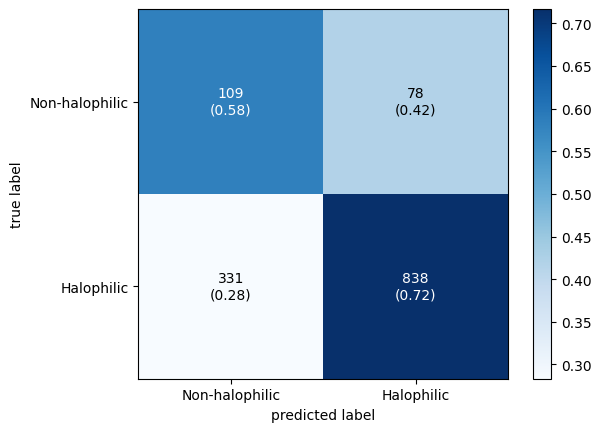

array([[109,  78],
       [331, 838]])

In [ ]:
classes = np.unique(Y_test)

confusion_matrix_data = confusion_matrix(Y_test, predicted_blstm, labels=classes)
conf_matrix(confusion_matrix_data)
confusion_matrix_data

# Bicaps


In [ ]:
def load_data_embedding():
    SEED = 42
    os.environ["PYTHONHASHSEED"] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)
    # the data, shuffled and split between train and test sets

    # create train dataset

    train_dataset = np.array(training_per_protein)
    #nsample, nx, ny = arr_train.shape
    #train_dataset = arr_train.reshape((nsample, nx*ny))


    # create test dataset

    test_dataset = np.array(test_per_protein)
    #nsample, nx, ny = arr_test.shape
    #test_dataset = arr_test.reshape((nsample, nx*ny))



    # encode labels
    labels_train_encoded = to_categorical(
        training_labels, num_classes=2, dtype="float32"
    )  # (14189, 2)
    labels_test_encoded = to_categorical(
        testing_labels, num_classes=2, dtype="float32"
    )  # (2272, 2)



    return train_dataset, labels_train_encoded, test_dataset, labels_test_encoded

## Persiapan

In [ ]:
import datetime
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    InputLayer,
    LSTM,
    Bidirectional,
    Embedding,
    Dense,
    Dropout,
    Flatten,
    Convolution1D,
    MaxPooling1D,
    BatchNormalization,
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [ ]:
from typing import List, Tuple

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split


def create_dataset(data_path: str) -> Tuple[List[str], List[int]]:
    dataset = pd.read_csv(data_path)
    dataset = dataset.sample(frac=1).reset_index(drop=True)  # shuffle the dataset
    return list(dataset["sequence"]), list(dataset["label"])


def split_dataset(
    sequences_list: List[str], labels_list: List[int], train_size: float = 0.8
) -> Tuple[List[str], List[str], List[str], List[int], List[int], List[int]]:
    dataset = pd.DataFrame({"sequence": sequences_list, "label": labels_list})
    dataset = dataset.sample(frac=1, random_state=1)
    train, remaining = train_test_split(dataset, train_size=train_size, random_state=2)
    valid, test = train_test_split(remaining, test_size=0.5, random_state=3)
    x_train, x_valid, x_test = train["sequence"], valid["sequence"], test["sequence"]
    y_train, y_valid, y_test = train["label"], valid["label"], test["label"]
    return (
        list(x_train),
        list(x_valid),
        list(x_test),
        list(y_train),
        list(y_valid),
        list(y_test),
    )


def one_hot_encoding(
    sequence: str,
    max_seq_length: int = 1000,
    CONSIDERED_AA: str = "ACDEFGHIKLMNPQRSTVWY",
):
    # adapt sequence size
    if len(sequence) > max_seq_length:
        # short the sequence
        sequence = sequence[:max_seq_length]
    else:
        # pad the sequence
        sequence = sequence + "." * (max_seq_length - len(sequence))

    # encode sequence
    encoded_sequence = np.zeros((max_seq_length, len(CONSIDERED_AA)))  # (1000, 20)
    for i, amino_acid in enumerate(sequence):
        if amino_acid in CONSIDERED_AA:
            encoded_sequence[i][CONSIDERED_AA.index(amino_acid)] = 1
    model_input = np.expand_dims(encoded_sequence, 0)  # add batch dimension

    return model_input  # (1, 1000, 20)


def preprocess_word_embedding_encoding(
    sequence: str,
    max_seq_length: int = 1000,
    CONSIDERED_AA: str = "ACDEFGHIKLMNPQRSTVWY",
):
    # amino acids encoding
    aa_mapping = {aa: i + 1 for i, aa in enumerate(CONSIDERED_AA)}

    # adapt sequence size
    if len(sequence) > max_seq_length:
        # short the sequence
        sequence = sequence[:max_seq_length]
    else:
        # pad the sequence
        sequence = sequence + "." * (max_seq_length - len(sequence))

    # encode sequence
    encoded_sequence = np.zeros((max_seq_length,))  # (1000,)
    for i, amino_acid in enumerate(sequence):
        if amino_acid in CONSIDERED_AA:
            encoded_sequence[i] = aa_mapping[amino_acid]
    model_input = np.expand_dims(encoded_sequence, 0)  # add batch dimension

    return model_input  # (1, 1000)

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))


def fbeta(y_true, y_pred, beta=2):
    y_pred = K.clip(y_pred, 0, 1)

    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    num = (1 + beta ** 2) * (p * r)
    den = (beta ** 2 * p + r + K.epsilon())
    return K.mean(num / den)


def matthews_correlation_coefficient(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))

    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return num / K.sqrt(den + K.epsilon())


def equal_error_rate(y_true, y_pred):
    n_imp = tf.count_nonzero(tf.equal(y_true, 0), dtype=tf.float32) + tf.constant(K.epsilon())
    n_gen = tf.count_nonzero(tf.equal(y_true, 1), dtype=tf.float32) + tf.constant(K.epsilon())

    scores_imp = tf.boolean_mask(y_pred, tf.equal(y_true, 0))
    scores_gen = tf.boolean_mask(y_pred, tf.equal(y_true, 1))

    loop_vars = (tf.constant(0.0), tf.constant(1.0), tf.constant(0.0))
    cond = lambda t, fpr, fnr: tf.greater_equal(fpr, fnr)
    body = lambda t, fpr, fnr: (
        t + 0.001,
        tf.divide(tf.count_nonzero(tf.greater_equal(scores_imp, t), dtype=tf.float32), n_imp),
        tf.divide(tf.count_nonzero(tf.less(scores_gen, t), dtype=tf.float32), n_gen)
    )
    t, fpr, fnr = tf.while_loop(cond, body, loop_vars, back_prop=False)
    eer = (fpr + fnr) / 2

    return eer

## Bicaps-DBP

In [ ]:
from keras.backend import *
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import math_ops


#own_batch_dot = batch_dot  # force standard implementation

# import of batch_dot operation from TF 1.13
# https://github.com/tensorflow/tensorflow/blob/v1.13.1/tensorflow/python/keras/backend.py

def own_batch_dot(x, y, axes=None):
  """Batchwise dot product.
  `batch_dot` is used to compute dot product of `x` and `y` when
  `x` and `y` are data in batch, i.e. in a shape of
  `(batch_size, :)`.
  `batch_dot` results in a tensor or variable with less dimensions
  than the input. If the number of dimensions is reduced to 1,
  we use `expand_dims` to make sure that ndim is at least 2.
  Arguments:
      x: Keras tensor or variable with `ndim >= 2`.
      y: Keras tensor or variable with `ndim >= 2`.
      axes: list of (or single) int with target dimensions.
          The lengths of `axes[0]` and `axes[1]` should be the same.
  Returns:
      A tensor with shape equal to the concatenation of `x`'s shape
      (less the dimension that was summed over) and `y`'s shape
      (less the batch dimension and the dimension that was summed over).
      If the final rank is 1, we reshape it to `(batch_size, 1)`.
  Examples:
      Assume `x = [[1, 2], [3, 4]]` and `y = [[5, 6], [7, 8]]`
      `batch_dot(x, y, axes=1) = [[17, 53]]` which is the main diagonal
      of `x.dot(y.T)`, although we never have to calculate the off-diagonal
      elements.
      Shape inference:
      Let `x`'s shape be `(100, 20)` and `y`'s shape be `(100, 30, 20)`.
      If `axes` is (1, 2), to find the output shape of resultant tensor,
          loop through each dimension in `x`'s shape and `y`'s shape:
      * `x.shape[0]` : 100 : append to output shape
      * `x.shape[1]` : 20 : do not append to output shape,
          dimension 1 of `x` has been summed over. (`dot_axes[0]` = 1)
      * `y.shape[0]` : 100 : do not append to output shape,
          always ignore first dimension of `y`
      * `y.shape[1]` : 30 : append to output shape
      * `y.shape[2]` : 20 : do not append to output shape,
          dimension 2 of `y` has been summed over. (`dot_axes[1]` = 2)
      `output_shape` = `(100, 30)`
  ```python
      >>> x_batch = K.ones(shape=(32, 20, 1))
      >>> y_batch = K.ones(shape=(32, 30, 20))
      >>> xy_batch_dot = K.batch_dot(x_batch, y_batch, axes=[1, 2])
      >>> K.int_shape(xy_batch_dot)
      (32, 1, 30)
  ```
  """
  if isinstance(axes, int):
    axes = (axes, axes)
  x_ndim = ndim(x)
  y_ndim = ndim(y)
  if axes is None:
    # behaves like tf.batch_matmul as default
    axes = [x_ndim - 1, y_ndim - 2]
  if x_ndim > y_ndim:
    diff = x_ndim - y_ndim
    y = array_ops.reshape(y,
                          array_ops.concat(
                              [array_ops.shape(y), [1] * (diff)], axis=0))
  elif y_ndim > x_ndim:
    diff = y_ndim - x_ndim
    x = array_ops.reshape(x,
                          array_ops.concat(
                              [array_ops.shape(x), [1] * (diff)], axis=0))
  else:
    diff = 0
  if ndim(x) == 2 and ndim(y) == 2:
    if axes[0] == axes[1]:
      out = math_ops.reduce_sum(math_ops.multiply(x, y), axes[0])
    else:
      out = math_ops.reduce_sum(
          math_ops.multiply(array_ops.transpose(x, [1, 0]), y), axes[1])
  else:
    adj_x = None if axes[0] == ndim(x) - 1 else True
    adj_y = True if axes[1] == ndim(y) - 1 else None
    out = math_ops.matmul(x, y, adjoint_a=adj_x, adjoint_b=adj_y)
  if diff:
    if x_ndim > y_ndim:
      idx = x_ndim + y_ndim - 3
    else:
      idx = x_ndim - 1
    out = array_ops.squeeze(out, list(range(idx, idx + diff)))
  if ndim(out) == 1:
    out = expand_dims(out, 1)
  return out

In [ ]:
"""
Some key layers used for constructing a Capsule Network. These layers can used to construct CapsNet on other dataset,
not just on MNIST.
*NOTE*: some functions can be implemented in multiple ways, I keep all of them. You can try them for yourself just by
uncommenting them and commenting their counterparts.
Author: Xifeng Guo, E-mail: `guoxifeng1990@163.com`, Github: `https://github.com/XifengGuo/CapsNet-Keras`
"""
import keras.backend as K
import tensorflow as tf
from keras import initializers, layers

class Length(layers.Layer):
    """
    Compute the length of vectors. This is used to compute a Tensor that has the same shape with y_true in margin_loss.
    Using this layer as model's output can directly predict labels by using `y_pred = np.argmax(model.predict(x), 1)`
    inputs: shape=[None, num_vectors, dim_vector]
    output: shape=[None, num_vectors]
    """
    def call(self, inputs, **kwargs):
        return K.sqrt(K.sum(K.square(inputs), -1))

    def compute_output_shape(self, input_shape):
        return input_shape[:-1]


class Mask(layers.Layer):
    """
    Mask a Tensor with shape=[None, num_capsule, dim_vector] either by the capsule with max length or by an additional
    input mask. Except the max-length capsule (or specified capsule), all vectors are masked to zeros. Then flatten the
    masked Tensor.
    For example:
        ```
        x = keras.layers.Input(shape=[8, 3, 2])  # batch_size=8, each sample contains 3 capsules with dim_vector=2
        y = keras.layers.Input(shape=[8, 3])  # True labels. 8 samples, 3 classes, one-hot coding.
        out = Mask()(x)  # out.shape=[8, 6]
        # or
        out2 = Mask()([x, y])  # out2.shape=[8,6]. Masked with true labels y. Of course y can also be manipulated.
        ```
    """
    def call(self, inputs, **kwargs):
        if type(inputs) is list:  # true label is provided with shape = [None, n_classes], i.e. one-hot code.
            assert len(inputs) == 2
            inputs, mask = inputs
        else:  # if no true label, mask by the max length of capsules. Mainly used for prediction
            # compute lengths of capsules
            x = K.sqrt(K.sum(K.square(inputs), -1))
            # generate the mask which is a one-hot code.
            # mask.shape=[None, n_classes]=[None, num_capsule]
            mask = K.one_hot(indices=K.argmax(x, 1), num_classes=tf.shape(x)[1])

        # inputs.shape=[None, num_capsule, dim_capsule]
        # mask.shape=[None, num_capsule]
        # masked.shape=[None, num_capsule * dim_capsule]
        masked = K.batch_flatten(inputs * K.expand_dims(mask, -1))
        return masked

    def compute_output_shape(self, input_shape):
        if type(input_shape[0]) is tuple:  # true label provided
            return tuple([None, input_shape[0][1] * input_shape[0][2]])
        else:  # no true label provided
            return tuple([None, input_shape[1] * input_shape[2]])


def squash(vectors, axis=-1):
    """
    The non-linear activation used in Capsule. It drives the length of a large vector to near 1 and small vector to 0
    :param vectors: some vectors to be squashed, N-dim tensor
    :param axis: the axis to squash
    :return: a Tensor with same shape as input vectors
    """
    s_squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = s_squared_norm / (1 + s_squared_norm) / K.sqrt(s_squared_norm + K.epsilon())
    return scale * vectors


class CapsuleLayer(layers.Layer):
    """
    The capsule layer. It is similar to Dense layer. Dense layer has `in_num` inputs, each is a scalar, the output of the
    neuron from the former layer, and it has `out_num` output neurons. CapsuleLayer just expand the output of the neuron
    from scalar to vector. So its input shape = [None, input_num_capsule, input_dim_capsule] and output shape = \
    [None, num_capsule, dim_capsule]. For Dense Layer, input_dim_capsule = dim_capsule = 1.

    :param num_capsule: number of capsules in this layer
    :param dim_capsule: dimension of the output vectors of the capsules in this layer
    :param num_routing: number of iterations for the routing algorithm
    """
    def __init__(self, num_capsule, dim_capsule, num_routing=3,
                 kernel_initializer='glorot_uniform',
                 **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.num_routing = num_routing
        self.kernel_initializer = initializers.get(kernel_initializer)

    def build(self, input_shape):
        assert len(input_shape) >= 3, "The input Tensor should have shape=[None, input_num_capsule, input_dim_capsule]"
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]

        # Transform matrix
        self.W = self.add_weight(shape=(self.num_capsule, self.input_num_capsule,
                                        self.dim_capsule, self.input_dim_capsule),
                                 initializer=self.kernel_initializer,
                                 name='W')

        self.built = True

    def call(self, inputs, training=None):
        # inputs.shape=[None, input_num_capsule, input_dim_capsule]
        # inputs_expand.shape=[None, 1, input_num_capsule, input_dim_capsule]
        inputs_expand = K.expand_dims(inputs, 1)

        # Replicate num_capsule dimension to prepare being multiplied by W
        # inputs_tiled.shape=[None, num_capsule, input_num_capsule, input_dim_capsule]
        inputs_tiled = K.tile(inputs_expand, [1, self.num_capsule, 1, 1])

        # Compute `inputs * W` by scanning inputs_tiled on dimension 0.
        # x.shape=[num_capsule, input_num_capsule, input_dim_capsule]
        # W.shape=[num_capsule, input_num_capsule, dim_capsule, input_dim_capsule]
        # Regard the first two dimensions as `batch` dimension,
        # then matmul: [input_dim_capsule] x [dim_capsule, input_dim_capsule]^T -> [dim_capsule].
        # inputs_hat.shape = [None, num_capsule, input_num_capsule, dim_capsule]
        inputs_hat = K.map_fn(lambda x: own_batch_dot(x, self.W, [2, 3]), elems=inputs_tiled)

        """
        # Begin: routing algorithm V1, dynamic ------------------------------------------------------------#
        # The prior for coupling coefficient, initialized as zeros.
        b = K.zeros(shape=[self.batch_size, self.num_capsule, self.input_num_capsule])
        def body(i, b, outputs):
            c = tf.nn.softmax(b, dim=1)  # dim=2 is the num_capsule dimension
            outputs = squash(K.batch_dot(c, inputs_hat, [2, 2]))
            if i != 1:
                b = b + K.batch_dot(outputs, inputs_hat, [2, 3])
            return [i-1, b, outputs]
        cond = lambda i, b, inputs_hat: i > 0
        loop_vars = [K.constant(self.num_routing), b, K.sum(inputs_hat, 2, keepdims=False)]
        shape_invariants = [tf.TensorShape([]),
                            tf.TensorShape([None, self.num_capsule, self.input_num_capsule]),
                            tf.TensorShape([None, self.num_capsule, self.dim_capsule])]
        _, _, outputs = tf.while_loop(cond, body, loop_vars, shape_invariants)
        # End: routing algorithm V1, dynamic ------------------------------------------------------------#
        """
        # Begin: Routing algorithm ---------------------------------------------------------------------#
        # In forward pass, `inputs_hat_stopped` = `inputs_hat`;
        # In backward, no gradient can flow from `inputs_hat_stopped` back to `inputs_hat`.
        inputs_hat_stopped = K.stop_gradient(inputs_hat)

        # The prior for coupling coefficient, initialized as zeros.
        # b.shape = [None, self.num_capsule, self.input_num_capsule].
        b = tf.zeros(shape=(K.shape(inputs_hat)[0], self.num_capsule, self.input_num_capsule))

        assert self.num_routing > 0, 'The num_routing should be > 0.'
        for i in range(self.num_routing):
            # c.shape=[batch_size, num_capsule, input_num_capsule]
            c = tf.nn.softmax(b, axis=1)

            # At last iteration, use `inputs_hat` to compute `outputs` in order to backpropagate gradient
            if i == self.num_routing - 1:
                # c.shape =  [batch_size, num_capsule, input_num_capsule]
                # inputs_hat.shape=[None, num_capsule, input_num_capsule, dim_capsule]
                # The first two dimensions as `batch` dimension,
                # then matmal: [input_num_capsule] x [input_num_capsule, dim_capsule] -> [dim_capsule].
                # outputs.shape=[None, num_capsule, dim_capsule]
                outputs = squash(own_batch_dot(c, inputs_hat, [2, 2]))  # [None, 10, 16]
            else:  # Otherwise, use `inputs_hat_stopped` to update `b`. No gradients flow on this path.
                outputs = squash(own_batch_dot(c, inputs_hat_stopped, [2, 2]))

                # outputs.shape =  [None, num_capsule, dim_capsule]
                # inputs_hat.shape=[None, num_capsule, input_num_capsule, dim_capsule]
                # The first two dimensions as `batch` dimension,
                # then matmal: [dim_capsule] x [input_num_capsule, dim_capsule]^T -> [input_num_capsule].
                # b.shape=[batch_size, num_capsule, input_num_capsule]
                b += own_batch_dot(outputs, inputs_hat_stopped, [2, 3])
        # End: Routing algorithm -----------------------------------------------------------------------#

        return outputs

    def compute_output_shape(self, input_shape):
        return tuple([None, self.num_capsule, self.dim_capsule])


def PrimaryCap(inputs, dim_capsule, n_channels, kernel_size, strides, padding):
    """
    Apply Conv2D `n_channels` times and concatenate all capsules
    :param inputs: 4D tensor, shape=[None, width, height, channels]
    :param dim_capsule: the dim of the output vector of capsule
    :param n_channels: the number of types of capsules
    :return: output tensor, shape=[None, num_capsule, dim_capsule]
    """
    output = layers.Conv1D(filters=dim_capsule*n_channels, kernel_size=kernel_size, strides=strides, padding=padding,
                           name='primarycap_conv2d')(inputs)
    outputs = layers.Reshape(target_shape=[-1, dim_capsule], name='primarycap_reshape')(output)
    return layers.Lambda(squash, name='primarycap_squash')(outputs)

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 23 09:31:07 2018
@author: Karush
"""

"""
Keras implementation of CapsNet in Hinton's paper Dynamic Routing Between Capsules.
The current version maybe only works for TensorFlow backend. Actually it will be straightforward to re-write to TF code.
Adopting to other backends should be easy, but I have not tested this.
Usage:
       python capsulenet.py
       python capsulenet.py --epochs 50
       python capsulenet.py --epochs 50 --routings 3
       ... ...

Result:
    Validation accuracy > 99.5% after 20 epochs. Converge to 99.66% after 50 epochs.
    About 110 seconds per epoch on a single GTX1070 GPU card

Author: Xifeng Guo, E-mail: `guoxifeng1990@163.com`, Github: `https://github.com/XifengGuo/CapsNet-Keras`
"""
#import json
#
#with open("keras.json") as json_file:
#		s2 = json.load(json_file)
#with open("keras.json",'w') as json_file:
#    json.dump(s1,json_file)


import numpy as np
import json
from keras import layers, models, optimizers
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from tensorflow.keras.utils import to_categorical
# from capsulelayers import CapsuleLayer, PrimaryCap, Length, Mask

#%%

def CapsNet(input_shape,top_words, maxlen, n_class, routings):
    """
    A Capsule Network on MNIST.
    :param input_shape: data shape, 3d, [width, height, channels]
    :param n_class: number of classes
    :param routings: number of routing iterations
    :return: Two Keras Models, the first one used for training, and the second one for evaluation.
            `eval_model` can also be used for training.
    """
    x = layers.Input(shape=input_shape)


    # Bi-LSTM layer
    # s= Bidirectional(LSTM(256,return_sequences=True))(x)
    # s= LSTM(256,return_sequences=True)(x)
    # s = GRU(256, return_sequences=True)(x)
    # Layer 1: Just a conventional Conv1D layer
    conv1 = layers.Conv1D(filters=256, kernel_size=9, strides=1, padding='valid', activation='relu', name='conv1')(x)

    # Layer 2: Conv2D layer with `squash` activation, then reshape to [None, num_capsule, dim_capsule]
    primarycaps = PrimaryCap(conv1, dim_capsule=8, n_channels=32, kernel_size=9, strides=2, padding='valid')

    # Layer 3: Capsule layer. Routing algorithm works here.
    digitcaps = CapsuleLayer(num_capsule=n_class, dim_capsule=8, num_routing=routings,
                             name='digitcaps')(primarycaps)

    # Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
    # If using tensorflow, this will not be necessary. :)
    out_caps = Length(name='capsnet')(digitcaps)

    # Decoder network.
    y = layers.Input(shape=(n_class,))
    masked_by_y = Mask()([digitcaps, y])  # The true label is used to mask the output of capsule layer. For training
    masked = Mask()(digitcaps)  # Mask using the capsule with maximal length. For prediction

    # Shared Decoder model in training and prediction
    decoder = models.Sequential(name='decoder')
    dec_3 = decoder.add(layers.Dense(np.prod(input_shape), activation='sigmoid', input_dim=10*n_class))
#    dec_1 = decoder.add(layers.Dense(16, activation='relu', input_dim=10*n_class))
#    dec_2 = decoder.add(layers.Dense(16, activation='relu'))
#    decoder.add(layers.Dropout(0.40))
#    dec_3 = decoder.add(layers.Dense(np.prod(input_shape), activation='sigmoid'))
    dec_4 = decoder.add(layers.Reshape(target_shape=input_shape, name='out_recon'))

    # Models for training and evaluation (prediction)
    train_model = models.Model(x,out_caps) #masked_by_y
    eval_model = models.Model(x, [out_caps, decoder(masked)])

    # manipulate model
    # noise = layers.Input(shape=(n_class, 10))
    # noised_digitcaps = layers.Add()([digitcaps, noise])
    # masked_noised_y = Mask()([noised_digitcaps, y])
    # manipulate_model = models.Model([x, y, noise], decoder(masked_noised_y))
    # return train_model, eval_model, manipulate_model
    return train_model, eval_model


def margin_loss(y_true, y_pred):
    """
    Margin loss for Eq.(4). When y_true[i, :] contains not just one `1`, this loss should work too. Not test it.
    :param y_true: [None, n_classes]
    :param y_pred: [None, num_capsule]
    :return: a scalar loss value.
    """
    L = y_true * K.square(K.maximum(0., 0.9 - y_pred)) + \
        0.5 * (1 - y_true) * K.square(K.maximum(0., y_pred - 0.1))

    return K.mean(K.sum(L, 1))


## Persiapan Kfold

In [ ]:
X_train,y_train,X_test,y_test = load_data_embedding()

In [ ]:
X_train[:,1].shape

(5670,)

In [ ]:
# split into samples (e.g. 14188/1 = 14188)
samples_train = list()
length = 1
n=5670
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
 # grab from i to i + 200
 sample_train = X_train[i:i+length]
 samples_train.append(sample_train)
print(len(samples_train))

5670


In [ ]:
X_test[:,1].shape

(1356,)

In [ ]:
y_train[1:]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
samples_test = list()
length = 1
n=1356
# step over the 5,000 in jumps of 200
for i in range(0,n,length):
 # grab from i to i + 200
 sample_test = X_test[i:i+length]
 samples_test.append(sample_test)
print(len(samples_test))

1356


In [ ]:
# convert list of arrays into 2d array
from numpy import array
data_train = array(samples_train)
data_test = array(samples_test)
print(data_train.shape)
print(data_test.shape)

(5670, 1, 1024)
(1356, 1, 1024)


In [ ]:
# data_train = data_train.reshape((len(samples_train), 32, 32))
# data_test = data_test.reshape((len(samples_test), 32, 32))

In [ ]:
data_train = data_train.reshape((len(samples_train), 1024,1))
data_test = data_test.reshape((len(samples_test), 1024, 1))
print(data_train.shape)
print(data_test.shape)

(5670, 1024, 1)
(1356, 1024, 1)


In [ ]:
train_dataset[1000].shape

(1024,)

In [ ]:
data_train.shape

(5670, 1024, 1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
inputs = np.concatenate((data_train, data_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

In [ ]:
print(inputs.shape)
print(targets.shape)

(7026, 1024, 1)
(7026, 2)


## Training Capsule Network

Instructions for updating:
Use fn_output_signature instead


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024, 1)]         0         
                                                                 
 conv1 (Conv1D)              (None, 1016, 256)         2560      
                                                                 
 primarycap_conv2d (Conv1D)  (None, 504, 256)          590080    
                                                                 
 primarycap_reshape (Reshap  (None, 16128, 8)          0         
 e)                                                              
                                                                 
 primarycap_squash (Lambda)  (None, 16128, 8)          0         
                                                                 
 digitcaps (CapsuleLayer)    (None, 2, 8)              2064384   
                                                             

FileNotFoundError: [Errno 2] No such file or directory: '/gdrive/MyDrive/PDB ESM 1b data 186 embedding epoch 30 1D capsnet saja 32 x40).JPG'

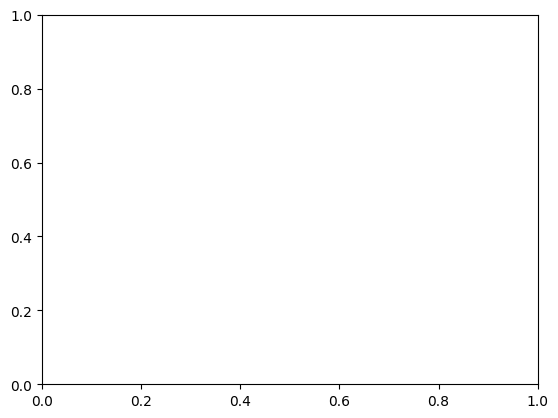

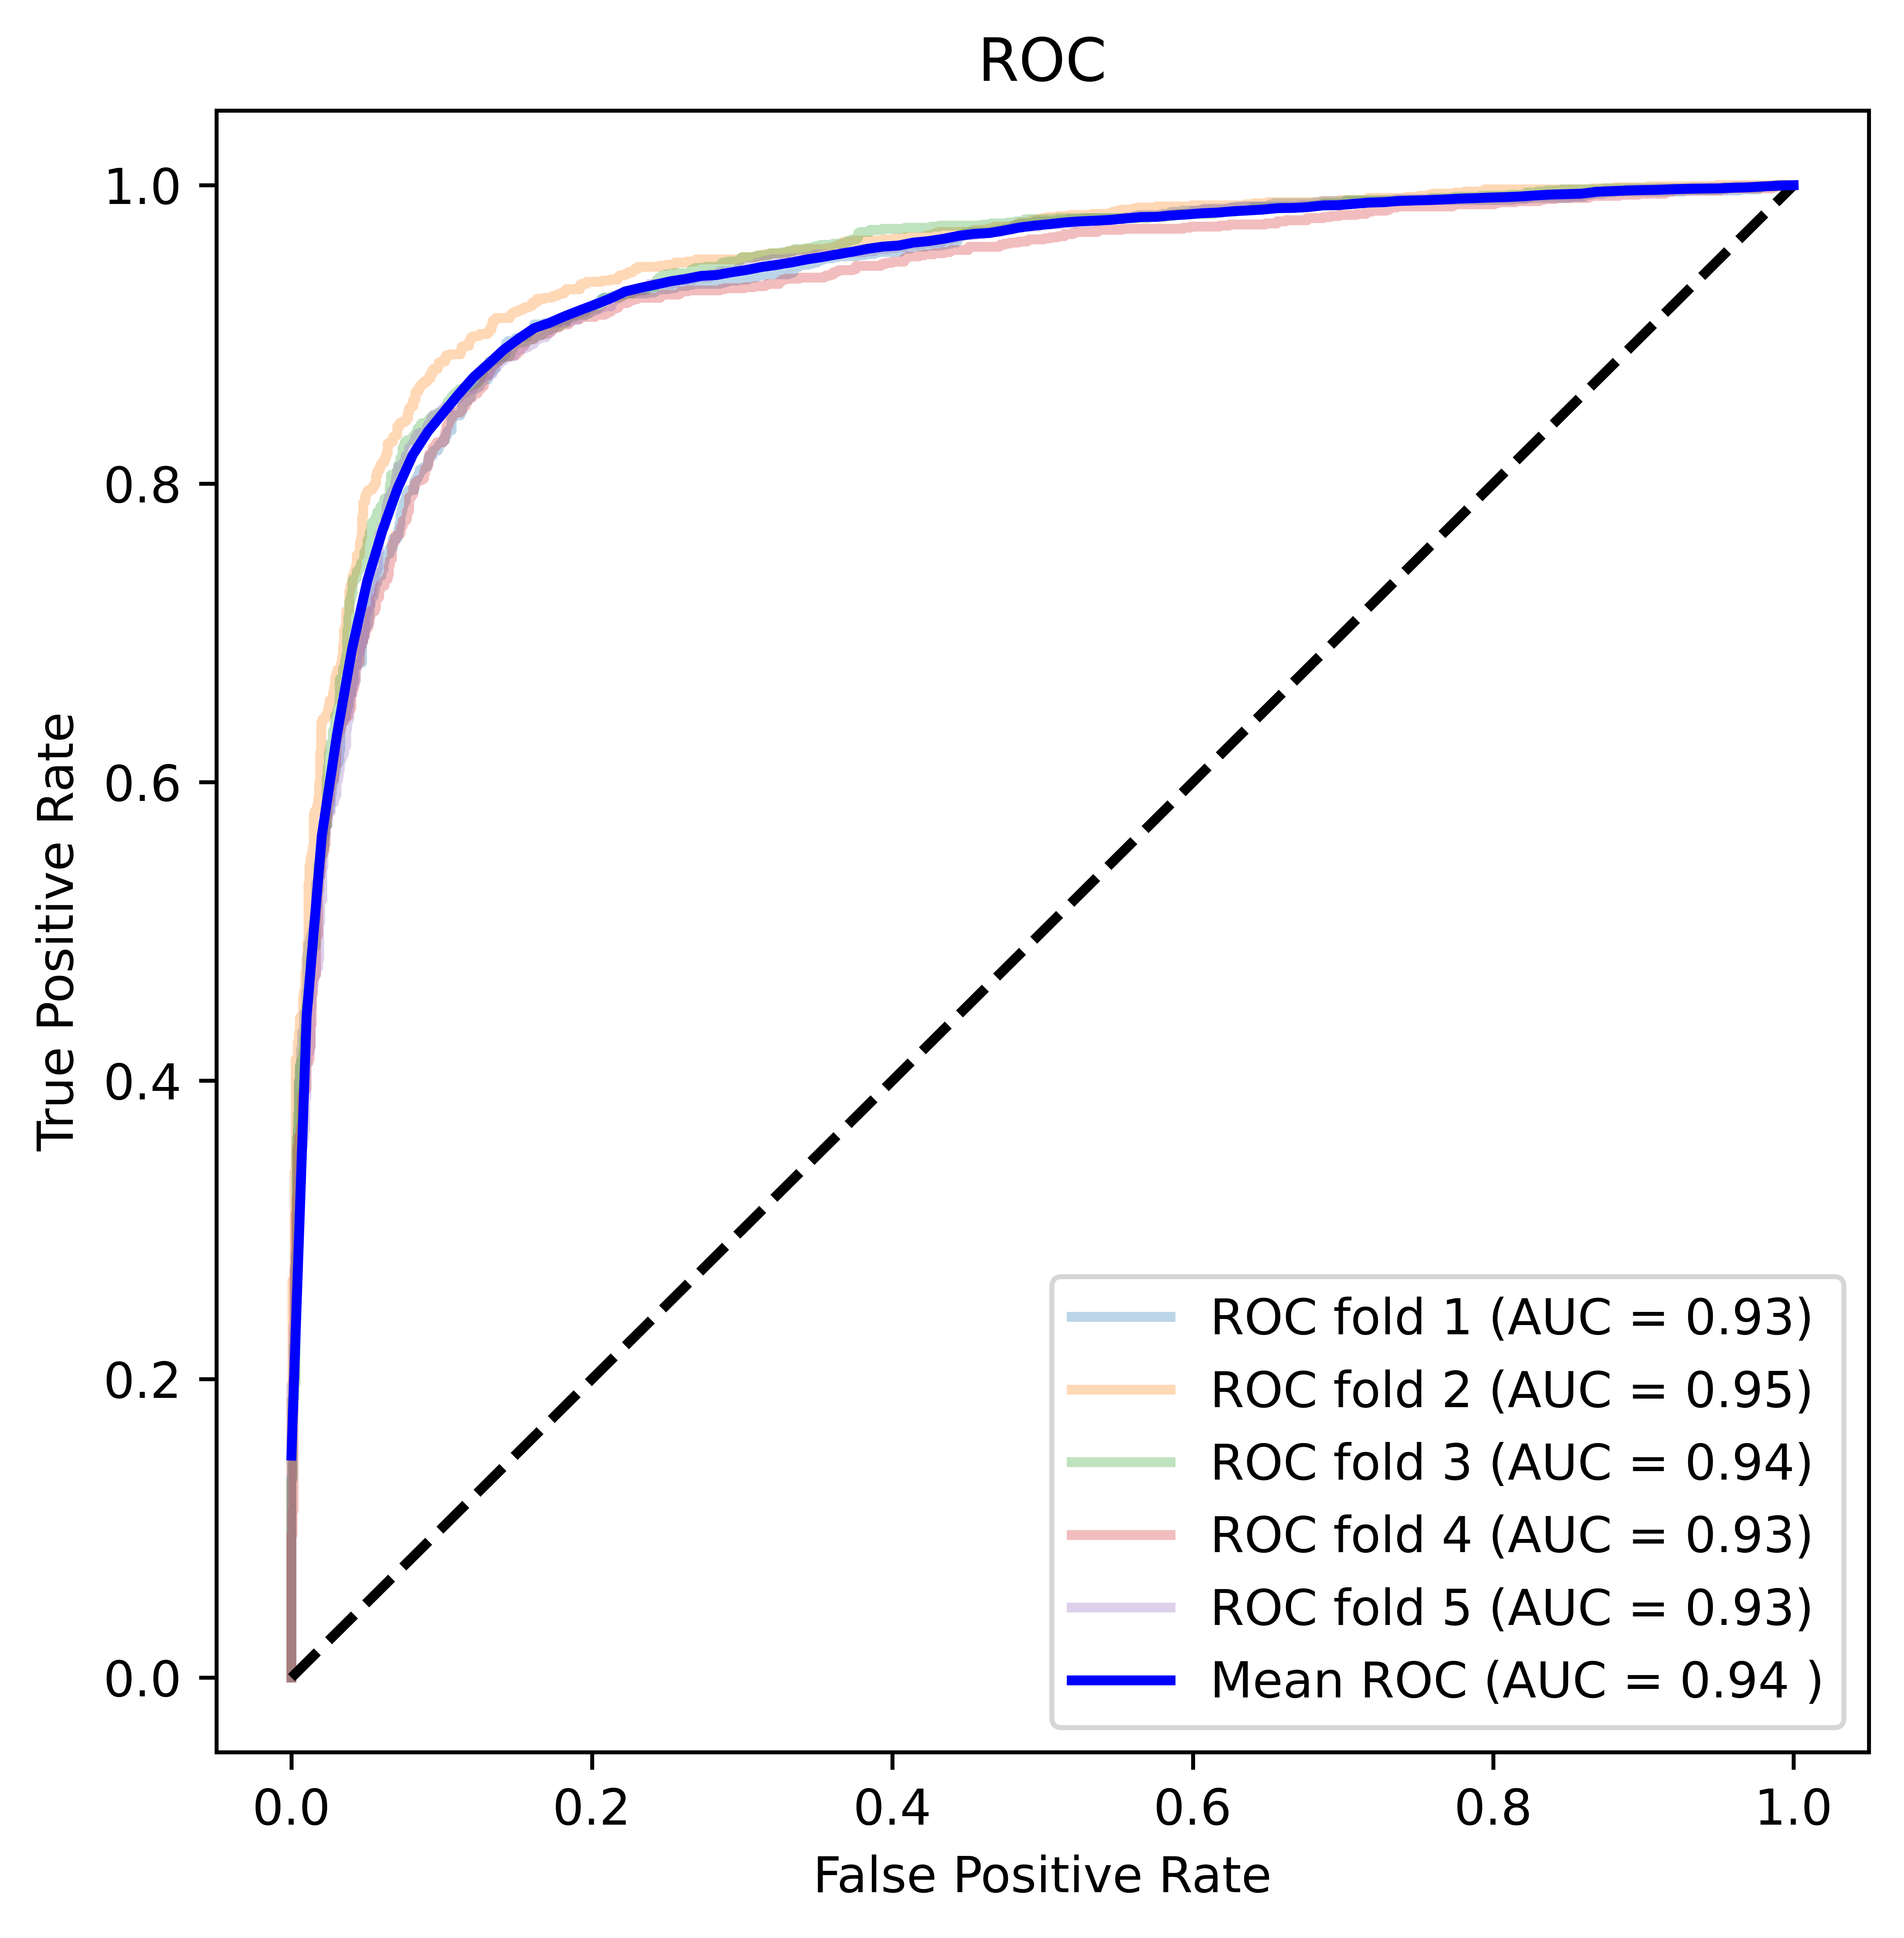

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from google.colab import files
from keras.layers import LeakyReLU, Dense, Input, Embedding, Dropout, Bidirectional, GRU, Flatten, SpatialDropout1D, concatenate,LSTM,Conv1D

acc_per_fold = []
loss_per_fold = []
sp_per_fold = []
prec_per_fold = []
sn_per_fold = []
AUC_per_fold = []
MCC_per_fold = []

tprs = []

aucs = []
conf_matrix_list_of_arrays = []

mean_fpr = np.linspace(0, 1, 100)
i = 1
fig, ax = plt.subplots()

# seed = 7
# np.random.seed(seed)

epoch=30
# unpacking the data
# (x_train, y_train), (x_test, y_test) = data

# set amino acids to consider
CONSIDERED_AA = "ACDEFGHIKLMNPQRSTVWY"

# embedding and convolution parameters
MAX_SEQ_LENGTH = 1024
VOCAB_SIZE = len(CONSIDERED_AA)
# EMBEDDING_SIZE = 128
# plt.figure(1)
plt.figure(figsize=(6,6), dpi= 1000)
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)
# kfold = StratifiedKFold(n_splits=5, shuffle=True)
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):


  model, eval_model = CapsNet(data_train[1,:].shape, VOCAB_SIZE, MAX_SEQ_LENGTH, n_class=2, routings=2)
  model.summary()

   # compile the model
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
                  loss=[margin_loss, 'binary_crossentropy'],
                  # loss_weights=[1., 0.392],
                  metrics=["accuracy", specificity, "Precision", "Recall", "AUC", matthews_correlation_coefficient])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  history = model.fit(inputs[train], targets[train],
              batch_size=128,
              epochs=epoch,
              # validation_split=0.05,
              verbose=1)
    # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%; {model.metrics_names[2]} of {scores[2]}; {model.metrics_names[3]} of {scores[3]}; {model.metrics_names[4]} of {scores[4]}; {model.metrics_names[5]} of {scores[5]}; {model.metrics_names[6]} of {scores[6]}')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  sp_per_fold.append(scores[2])
  prec_per_fold.append(scores[3])
  sn_per_fold.append(scores[4])
  AUC_per_fold.append(scores[5])
  MCC_per_fold.append(scores[6])

  y_pred_keras = model.predict(inputs[test])

  conf_matrix = confusion_matrix(targets[test].argmax(axis=1), y_pred_keras.argmax(axis=1))
  conf_matrix_list_of_arrays .append(conf_matrix)

  fpr, tpr, thresholds = roc_curve(targets[test].ravel(), y_pred_keras.ravel())
  tprs.append(np.interp(mean_fpr, fpr, tpr))
  roc_auc = auc(fpr, tpr)
  aucs.append(roc_auc)

  plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (fold_no, roc_auc))


  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}% - Specificity: {sp_per_fold[i]} - Precision: {prec_per_fold[i]} - Sensitivity: {sn_per_fold[i]} - AUC: {AUC_per_fold[i]} - MCC: {MCC_per_fold[i]}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print(f'> Specificity: {np.mean(sp_per_fold)}(+- {np.std(sp_per_fold)})')
print(f'> Precision: {np.mean(prec_per_fold)}(+- {np.std(prec_per_fold)})')
print(f'> Sensitivity: {np.mean(sn_per_fold)}(+- {np.std(sn_per_fold)})')
print(f'> AUC: {np.mean(AUC_per_fold)}')
print(f'> MCC: {np.mean(MCC_per_fold)}(+- {np.std(MCC_per_fold)})')
print('------------------------------------------------------------------------')

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
# image = plt.figure(figsize=(16,10), dpi= 200)

#images_dir = "/gdrive/MyDrive"
#plt.savefig(f"{images_dir}/PDB ESM 1b data 186 embedding epoch 30 1D capsnet saja 32 x40).JPG",dpi=1000)
plt.show()

#mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
# plt.savefig("DPB",dpi=500)
# tf.keras.models.save_model(model, filepath="/gdrive/MyDrive/DNA Binding Protein/Dbp app/logs3/model blstm Adam 100 epoch reduce plateu one hot 128 sequence 600",save_format='hdf5')

In [ ]:
caps_predict = model.predict(data_test).round()
# print(caps_predict)
accuracy = accuracy_score(y_test, caps_predict)

print(f"Our model has an accuracy of {accuracy:}")

NameError: name 'model' is not defined

In [ ]:
f1_score(y_test, caps_predict, average="macro")

In [ ]:
matthews_correlation_coefficient(y_test, caps_predict)

In [ ]:
specificity(y_test, caps_predict)

In [ ]:
recall(y_test, caps_predict)

# Light Attention

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
import numpy as np

# Define the model
class LightAttentionBinary(nn.Module):
    def __init__(self, embeddings_dim=1024, dropout=0.25, kernel_size=9, conv_dropout=0.25):
        super(LightAttentionBinary, self).__init__()
        self.feature_convolution = nn.Conv1d(embeddings_dim, embeddings_dim, kernel_size, stride=1, padding=kernel_size // 2)
        self.attention_convolution = nn.Conv1d(embeddings_dim, embeddings_dim, kernel_size, stride=1, padding=kernel_size // 2)
        self.softmax = nn.Softmax(dim=-1)
        self.dropout = nn.Dropout(conv_dropout)
        self.linear = nn.Sequential(
            nn.Linear(2 * embeddings_dim, 32),
            nn.Dropout(dropout),
            nn.ReLU(),
            nn.BatchNorm1d(32)
        )
        self.output = nn.Linear(32, 1)  # Output dimension is 1 for binary classification

    def forward(self, x, mask):
        o = self.feature_convolution(x)
        o = self.dropout(o)
        attention = self.attention_convolution(x)
        attention = attention.masked_fill(mask[:, None, :] == False, -1e9)
        o1 = torch.sum(o * self.softmax(attention), dim=-1)
        o2, _ = torch.max(o, dim=-1)
        o = torch.cat([o1, o2], dim=-1)
        o = self.linear(o)
        return self.output(o).squeeze(-1)

# Example data

x_train = torch.tensor(training_per_protein, dtype=torch.float32)
x_val = torch.tensor(test_per_protein, dtype=torch.float32)
y_train = torch.tensor(training_labels, dtype=torch.float32)
y_val = torch.tensor(testing_labels, dtype=torch.float32)

#x_train = torch.randn(5670, 1024)
#y_train = torch.randint(0, 2, (5670,))
mask_train = torch.ones(5670, 1024, dtype=torch.bool)

#x_val = torch.randn(5670, 1024)
#y_val = torch.randint(0, 2, (5670,))
#mask_val = torch.ones(5670, 1024, dtype=torch.bool)
mask_val = torch.ones(x_val.shape[0], x_val.shape[1], dtype=torch.bool)

# Create DataLoader
train_dataset = TensorDataset(x_train, y_train, mask_train)
val_dataset = TensorDataset(x_val, y_val, mask_val)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LightAttentionBinary(embeddings_dim=1024).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and validation functions
def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    for batch in dataloader:
        x, y, mask = batch
        x, y, mask = x.to(device), y.to(device), mask.to(device)
        optimizer.zero_grad()
        outputs = model(x.unsqueeze(-1), mask)
        loss = criterion(outputs, y.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    all_targets = []
    all_predictions = []
    with torch.no_grad():
        for batch in dataloader:
            x, y, mask = batch
            x, y, mask = x.to(device), y.to(device), mask.to(device)
            outputs = model(x.unsqueeze(-1), mask)
            loss = criterion(outputs, y.float())
            total_loss += loss.item()
            all_targets.extend(y.cpu().numpy())
            all_predictions.extend(torch.sigmoid(outputs).cpu().numpy())
    all_targets = np.array(all_targets)
    all_predictions = np.array(all_predictions)
    accuracy = accuracy_score(all_targets, all_predictions.round())
    precision = precision_score(all_targets, all_predictions.round())
    recall = recall_score(all_targets, all_predictions.round())
    f1 = f1_score(all_targets, all_predictions.round())
    roc_auc = roc_auc_score(all_targets, all_predictions)
    mcc = matthews_corrcoef(all_targets, all_predictions.round())
    metrics = {
        'loss': total_loss / len(dataloader),
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'mcc': mcc
    }
    return metrics

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_dataloader, criterion, optimizer, device)
    val_metrics = evaluate_model(model, val_dataloader, criterion, device)
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Validation Loss: {val_metrics['loss']:.4f}")
    print(f"Accuracy: {val_metrics['accuracy']:.4f}, Precision: {val_metrics['precision']:.4f}, Recall: {val_metrics['recall']:.4f}, F1 Score: {val_metrics['f1_score']:.4f}, ROC AUC: {val_metrics['roc_auc']:.4f}, MCC: {val_metrics['mcc']:.4f}")


Epoch 1/10
Train Loss: 0.4162
Validation Loss: 0.4489
Accuracy: 0.8149, Precision: 0.9330, Recall: 0.8460, F1 Score: 0.8874, ROC AUC: 0.8278, MCC: 0.3893
Epoch 2/10
Train Loss: 0.3252
Validation Loss: 0.3927
Accuracy: 0.8414, Precision: 0.9214, Recall: 0.8922, F1 Score: 0.9066, ROC AUC: 0.8336, MCC: 0.3865
Epoch 3/10
Train Loss: 0.3004
Validation Loss: 0.4647
Accuracy: 0.8289, Precision: 0.9358, Recall: 0.8606, F1 Score: 0.8966, ROC AUC: 0.8458, MCC: 0.4182
Epoch 4/10
Train Loss: 0.2897
Validation Loss: 0.3967
Accuracy: 0.8289, Precision: 0.9407, Recall: 0.8554, F1 Score: 0.8961, ROC AUC: 0.8608, MCC: 0.4344
Epoch 5/10
Train Loss: 0.2775
Validation Loss: 0.4069
Accuracy: 0.8267, Precision: 0.9473, Recall: 0.8460, F1 Score: 0.8938, ROC AUC: 0.8674, MCC: 0.4521
Epoch 6/10
Train Loss: 0.2748
Validation Loss: 0.4002
Accuracy: 0.8363, Precision: 0.9438, Recall: 0.8614, F1 Score: 0.9007, ROC AUC: 0.8579, MCC: 0.4551
Epoch 7/10
Train Loss: 0.2602
Validation Loss: 0.4336
Accuracy: 0.8319, Prec

torch.Size([5670, 1024])
torch.Size([5670, 1])
